<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/MNIST_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feedfoward  Neural  Network
Fully Connected Network
##Deep Learning (MNIST Classification) -  part #3

In [ ]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 16.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
# importando as bibliotecas tradicionais mais utilizadas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# importando o MNIST digit dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

2025-01-17 15:29:36.504150: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


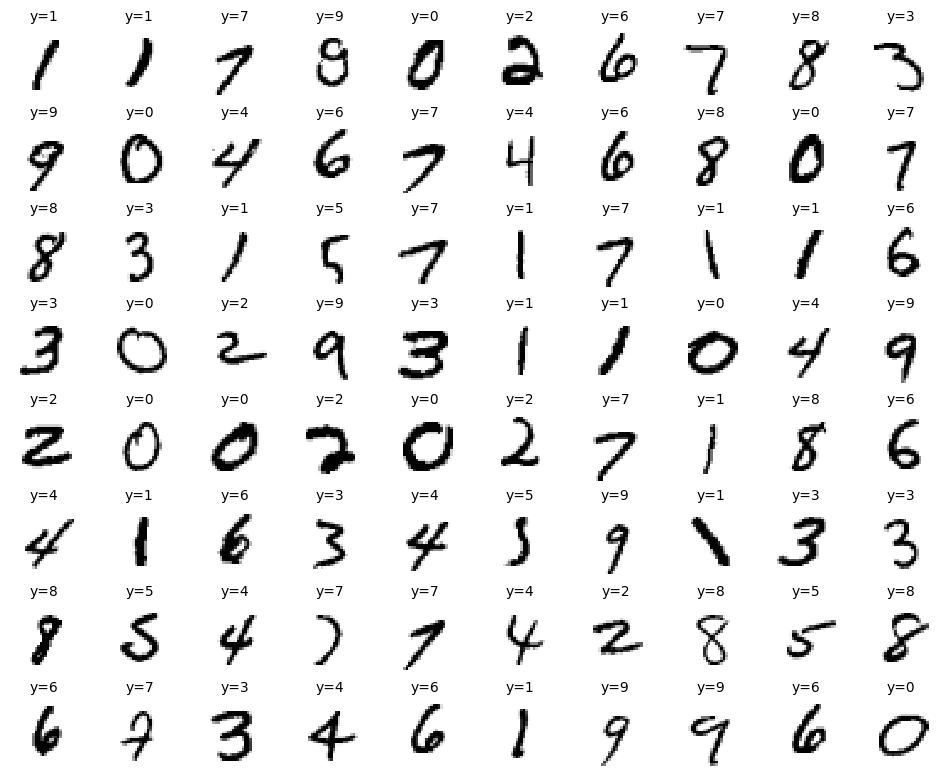

In [ ]:
# Visualização de parte do dataset
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
n_rows = 8
n_cols = 10
rand = np.random.randint(100)
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index+rand], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title('y='+class_names[y_train[index+rand]], fontsize=10)
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

In [ ]:
# outra maneira de visualização de parte aleatória do dataset
def show_data(examples, targets):
  samples = 80
  rand_num = np.random.randint(0, examples.shape[0] - samples)
  plt.figure(figsize = (8,8))
  for i in range(samples):
    plt.subplot(8, 10, i+1)
    plt.imshow(examples[rand_num + i], cmap = 'Greys')
    plt.xlabel(f"Label: {targets[rand_num + i]}")
    plt.xticks([])
    plt.yticks([])
  plt.tight_layout()
  plt.show()

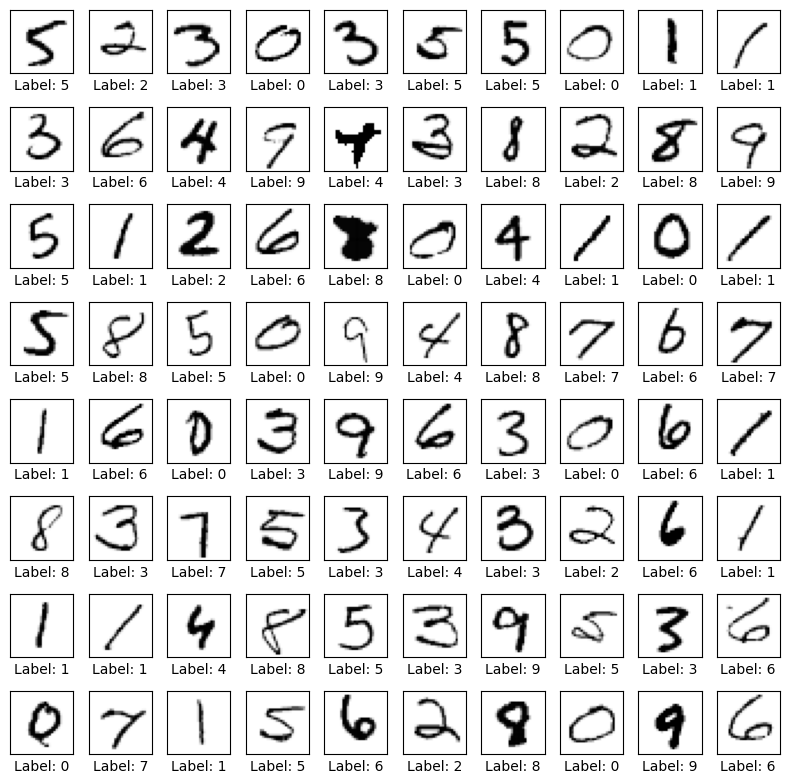

In [ ]:
# 80 amostras randômicas do dataset
show_data(X_train, y_train)

In [ ]:
# Formatação dos dados de entrada
# Redução da dimensão do tensor de 28x28 para 784
X_train_flat = X_train.reshape(60000, 784)
# outra maneira de se fazer o reshape de 28x28 para 784
X_test_flat = X_test.reshape(-1, 28*28)

print('X_train_flat:',X_train_flat.shape)
print('X_test_flat:',X_test_flat.shape)

X_train_flat: (60000, 784)
X_test_flat: (10000, 784)


In [ ]:
# reescalonamento
max_value = X_train.max()
print('Valor máximo do pixel:', max_value)
X_train_sc = X_train_flat / max_value
X_test_sc = X_test_flat / max_value
print(f'Valor mínimo do pixel após o reescalonamento: {X_train_sc.min()}')
print(f'Valor máximo do pixel após o reescalonamento: {X_train_sc.max()}')

Valor máximo do pixel: 255
Valor mínimo do pixel após o reescalonamento: 0.0
Valor máximo do pixel após o reescalonamento: 1.0


In [ ]:
# TensorFlow Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.backend as K

In [ ]:
# Arquitetura da rede para os testes iniciais
# inicializa a sessão
K.clear_session()
# inicialização do modelo
model = Sequential(name='rede1')
# camada de entrada = 784 neurônios
model.add(Input((784,), name='input'))
# primeira hidden layer = 50 neurônios e função de ativação = relu
model.add(Dense(units = 50, activation = 'relu', name='layer1'))
# camada de saída
model.add(Dense(10, activation='softmax', name='output'))
# sumário do modelo da rede
model.summary()

Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilação do modelo
# learning rate (eta)
eta = 0.01
# optimizer = Stocatisc Gradient Decent
optimizer_=SGD(eta)
# compilando o modelo da rede
#model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
# não faremos o categorical encoding nas classes (y) pois utilizaremos a função perda loss = 'sparse_categorical_crossentropy'
model.compile(optimizer = optimizer_, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
# salva os pesos e bias com os valores inicias
# model.save_weights('model.h5')
weights = model.get_weights()

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# para medição do tempo de treinamento
import time
# início do treinamento da rede
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
model.set_weights(weights)
# treinamento da rede
# h = model.fit(X_train_sc, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.1)
h = model.fit(X_train_sc, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
training_time_s = time.process_time() - start_time
training_time_m = training_time_s / 60
print("\nTempo de treinamento da rede: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4719 - loss: 1.7835 - val_accuracy: 0.8627 - val_loss: 0.7040
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8385 - loss: 0.6976 - val_accuracy: 0.8962 - val_loss: 0.4539
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8721 - loss: 0.5042 - val_accuracy: 0.9072 - val_loss: 0.3758
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8855 - loss: 0.4338 - val_accuracy: 0.9128 - val_loss: 0.3375
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8912 - loss: 0.4009 - val_accuracy: 0.9155 - val_loss: 0.3156
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8930 - loss: 0.3846 - val_accuracy: 0.9197 - val_loss: 0.2991
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9023 - loss: 0.3567 - val_accuracy: 0.9223 - val_loss: 0.2880
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9032 - loss: 0.3458 - val_accuracy: 0.

In [ ]:
# plot graphs function
def plot_graphs():
  plt.figure(figsize = (11,5))
  plt.subplot(1,2,1)
  plt.plot(h.history['loss'], label = 'Treino')
  plt.plot(h.history['val_loss'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Função Custo')
  plt.title('loss')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.grid()
  plt.subplot(1,2,2)
  plt.plot(h.history['accuracy'], label = 'Treino')
  plt.plot(h.history['val_accuracy'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Acurácia')
  plt.title('accuracy')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.tight_layout()
  plt.grid()
  plt.show()

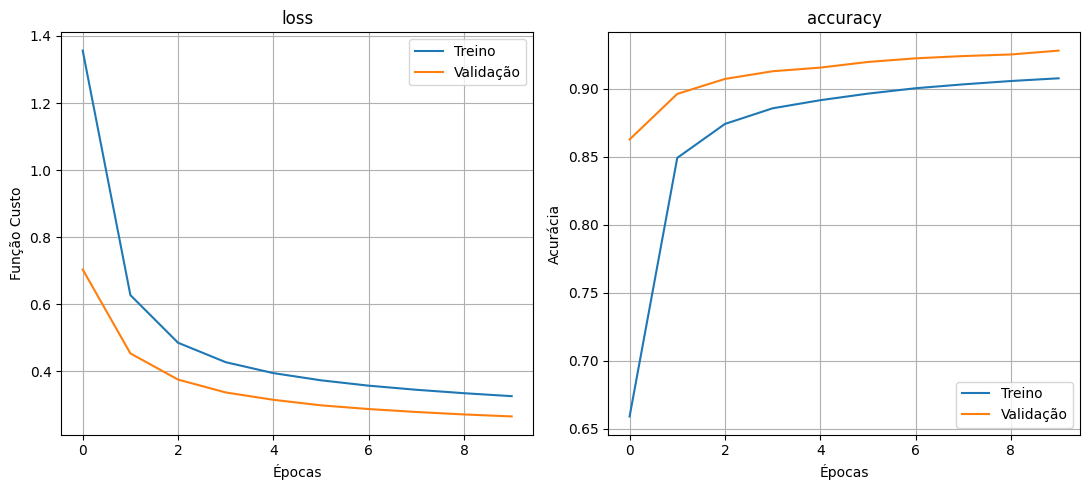

In [ ]:
plot_graphs()

### Learning Rates
Let's explore what happens to the performance of our model if we change the learning rate. We can do this with a simple loop where we perform the following steps:

1. We recompile the model with a different learning rate.
1. We reset the weights to the initial value.
1. We retrain the model and append the results to a list.

In [ ]:
# fitting the model with different learning rates
start_time = time.process_time()
dflist = []
learning_rates = [0.01, 0.05, 0.1, 0.5]
for lr in learning_rates:
  inter_time = time.process_time()
  # compilo o modelo com o learning rate a ser uitlizado
  model.compile(optimizer = SGD(learning_rate=lr), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  # inicializo os pesos
  model.set_weights(weights)
  # treino o modelo
  h = model.fit(X_train_sc, y_train, batch_size=128, epochs=10, verbose=0, validation_split=0.1)
  # salvo o resultado do treinamento em um data frame pandas
  dflist.append(pd.DataFrame(h.history, index=h.epoch))
  print("Done: {}".format(lr))

  training_time_s = time.process_time() - inter_time
  training_time_m = training_time_s / 60
  print("Tempo: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

training_time_s = time.process_time() - start_time
training_time_m = training_time_s / 60
print("\nTempo de treinamento total: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

Done: 0.01
Tempo: 18.84 segundos (0.31 minutos)
Done: 0.05
Tempo: 18.19 segundos (0.30 minutos)
Done: 0.1
Tempo: 17.02 segundos (0.28 minutos)
Done: 0.5
Tempo: 17.61 segundos (0.29 minutos)

Tempo de treinamento total: 71.66 segundos (1.19 minutos)


We can concatenate all our results in a single file for easy visualization using the `pd.concat` function along the columns axis.

In [ ]:
historydf = pd.concat(dflist, axis=1)
historydf

,accuracy,loss,val_accuracy,val_loss,accuracy,loss,val_accuracy,val_loss,accuracy,loss,val_accuracy,val_loss,accuracy,loss,val_accuracy,val_loss
0,0.657519,1.354274,0.861167,0.703396,0.826870,0.668298,0.914000,0.318135,0.859370,0.520284,0.927500,0.271282,0.893944,0.353167,0.951333,0.169413
1,0.849333,0.627296,0.896167,0.453913,0.900426,0.353202,0.925667,0.268356,0.914000,0.303548,0.938667,0.225704,0.950907,0.162315,0.963167,0.128088
2,0.874093,0.485552,0.905833,0.375553,0.911722,0.311588,0.930833,0.247457,0.925574,0.258940,0.944500,0.200939,0.963370,0.122248,0.967000,0.109386
3,0.885556,0.427808,0.914000,0.337154,0.918389,0.286230,0.935333,0.231985,0.935907,0.224104,0.954333,0.174545,0.970704,0.099140,0.971333,0.101140
4,0.891944,0.395284,0.917167,0.314604,0.924685,0.266161,0.941667,0.216129,0.943519,0.197383,0.956667,0.162950,0.974241,0.084767,0.970333,0.097032
5,0.896759,0.373623,0.920167,0.299550,0.930870,0.247661,0.947833,0.200374,0.949463,0.177113,0.961833,0.146085,0.977778,0.074025,0.970333,0.105438
6,0.900537,0.357848,0.922667,0.288265,0.934796,0.230895,0.948667,0.193625,0.953722,0.160857,0.963333,0.138599,0.978574,0.067288,0.976833,0.084608
7,0.903019,0.345443,0.924167,0.278950,0.938241,0.215983,0.953667,0.177639,0.958352,0.147322,0.965500,0.128815,0.982204,0.059186,0.972667,0.088387
8,0.905481,0.335352,0.924833,0.271787,0.942556,0.202684,0.956000,0.168885,0.960685,0.136436,0.967667,0.125573,0.983259,0.053617,0.973667,0.088954
9,0.908037,0.326648,0.928833,0.265254,0.945426,0.191214,0.959167,0.159132,0.963611,0.127423,0.968000,0.117230,0.985167,0.048578,0.975500,0.089100


And we can add information about the learning rate in a secondary column index using the `pd.MultiIndex` class.

In [ ]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported], names=['learning_rate', 'metric'])
historydf.columns = idx
historydf

learning_rate      0.01                                       0.05            \
metric         accuracy      loss val_accuracy  val_loss  accuracy      loss   
0              0.657519  1.354274     0.861167  0.703396  0.826870  0.668298   
1              0.849333  0.627296     0.896167  0.453913  0.900426  0.353202   
2              0.874093  0.485552     0.905833  0.375553  0.911722  0.311588   
3              0.885556  0.427808     0.914000  0.337154  0.918389  0.286230   
4              0.891944  0.395284     0.917167  0.314604  0.924685  0.266161   
5              0.896759  0.373623     0.920167  0.299550  0.930870  0.247661   
6              0.900537  0.357848     0.922667  0.288265  0.934796  0.230895   
7              0.903019  0.345443     0.924167  0.278950  0.938241  0.215983   
8              0.905481  0.335352     0.924833  0.271787  0.942556  0.202684   
9              0.908037  0.326648     0.928833  0.265254  0.945426  0.191214   

learning_rate                             0.10                         \
metric        val_accuracy  val_loss  accuracy      loss val_accuracy   
0                 0.914000  0.318135  0.859370  0.520284     0.927500   
1                 0.925667  0.268356  0.914000  0.303548     0.938667   
2                 0.930833  0.247457  0.925574  0.258940     0.944500   
3                 0.935333  0.231985  0.935907  0.224104     0.954333   
4                 0.941667  0.216129  0.943519  0.197383     0.956667   
5                 0.947833  0.200374  0.949463  0.177113     0.961833   
6                 0.948667  0.193625  0.953722  0.160857     0.963333   
7                 0.953667  0.177639  0.958352  0.147322     0.965500   
8                 0.956000  0.168885  0.960685  0.136436     0.967667   
9                 0.959167  0.159132  0.963611  0.127423     0.968000   

learning_rate                0.50                                   
metric         val_loss  accuracy      loss val_accuracy  val_loss  
0              0.271282  0.893944  0.353167     0.951333  0.169413  
1              0.225704  0.950907  0.162315     0.963167  0.128088  
2              0.200939  0.963370  0.122248     0.967000  0.109386  
3              0.174545  0.970704  0.099140     0.971333  0.101140  
4              0.162950  0.974241  0.084767     0.970333  0.097032  
5              0.146085  0.977778  0.074025     0.970333  0.105438  
6              0.138599  0.978574  0.067288     0.976833  0.084608  
7              0.128815  0.982204  0.059186     0.972667  0.088387  
8              0.125573  0.983259  0.053617     0.973667  0.088954  
9              0.117230  0.985167  0.048578     0.975500  0.089100

Now we can display the behavior of loss and accuracy as a function of the learning rate.

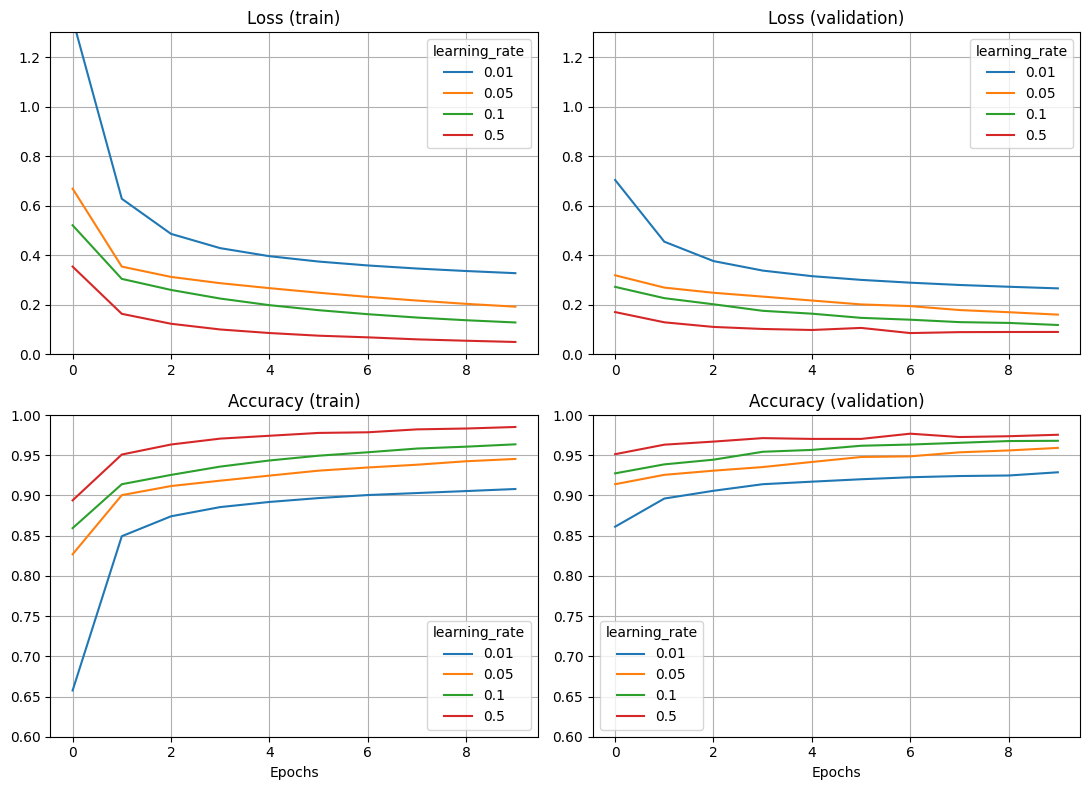

In [ ]:
fig = plt.figure(figsize = (11,8))
ax = plt.subplot(221)
hxs = historydf.xs('loss', axis=1, level='metric')
hxs.plot(ylim=(0,1.3), ax=ax)
plt.title("Loss (train)")
plt.grid()

ax = plt.subplot(222)
hxs = historydf.xs('val_loss', axis=1, level='metric')
hxs.plot(ylim=(0,1.3), ax=ax)
plt.title("Loss (validation)")
plt.grid()

ax = plt.subplot(223)
hxs = historydf.xs('accuracy', axis=1, level='metric')
hxs.plot(ylim=(0.6,1), ax=ax)
plt.title("Accuracy (train)")
plt.xlabel("Epochs")
plt.grid()

ax = plt.subplot(224)
hxs = historydf.xs('val_accuracy', axis=1, level='metric')
hxs.plot(ylim=(0.6,1), ax=ax)
plt.title("Accuracy (validation)")
plt.xlabel("Epochs")
plt.grid()

plt.tight_layout()
plt.show()

As expected a small learning rate gives a much slower decrease in the loss. Another hyperparameter we can try to tune is the **Batch Size**. Let's see how changing batch size affects the convergence of the model.

### Batch Sizes

Let's loop over increasing batch sizes from `32` points up to `256`.

In [ ]:
dflist = []
# learning rate
lr = 0.1
start_time = time.process_time()
# batch_sizes = [1, 8, 32, 128]
batch_sizes = [16, 32, 64, 128, 256]
# compilo o modelo com o learning rate a ser uitlizado
model.compile(optimizer = SGD(learning_rate=lr), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

for batch_size in batch_sizes:
    inter_time = time.process_time()
    # inicializo os pesos
    model.set_weights(weights)
    # treino o modelo com diferentes batch sizes
    h = model.fit(X_train_sc, y_train, batch_size=batch_size, epochs=10, verbose=0, validation_split=0.1)
    # salvo o resultado do treinamento em um data frame pandas
    dflist.append(pd.DataFrame(h.history, index=h.epoch))
    print("Done: {}".format(batch_size))

    training_time_s = time.process_time() - inter_time
    training_time_m = training_time_s / 60
    print("Tempo: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

training_time_s = time.process_time() - start_time
training_time_m = training_time_s / 60
print("\nTempo de treinamento total: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

Done: 16
Tempo: 61.57 segundos (1.03 minutos)
Done: 32
Tempo: 35.99 segundos (0.60 minutos)
Done: 64
Tempo: 27.47 segundos (0.46 minutos)
Done: 128
Tempo: 17.02 segundos (0.28 minutos)
Done: 256
Tempo: 13.34 segundos (0.22 minutos)

Tempo de treinamento total: 155.40 segundos (2.59 minutos)


Like we did above we can arrange the results in a `Pandas` Dataframe for easy display. Notice how we are using the `pd.MultiIndex.from_product` function to create a multi-index for the columns so that the data is organized by batch size and by metric.

In [ ]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported], names=['batch_size', 'metric'])
historydf.columns = idx
historydf

batch_size       16                                         32             \
metric      accuracy      loss val_accuracy  val_loss  accuracy      loss   
0           0.913815  0.291285     0.963833  0.138788  0.899370  0.348614   
1           0.955611  0.145241     0.966833  0.114998  0.947222  0.181683   
2           0.966907  0.112089     0.969500  0.107954  0.960000  0.135936   
3           0.971704  0.093189     0.972000  0.094835  0.967537  0.111642   
4           0.975815  0.078932     0.971333  0.093031  0.971852  0.095109   
5           0.977796  0.068965     0.973500  0.090096  0.975019  0.083553   
6           0.980667  0.060660     0.973667  0.092306  0.977148  0.074353   
7           0.983074  0.054805     0.968333  0.109734  0.980537  0.066369   
8           0.984852  0.047457     0.972000  0.091720  0.981981  0.059801   
9           0.985333  0.043720     0.976000  0.091072  0.982963  0.055461   

batch_size                              64                                    \
metric     val_accuracy  val_loss  accuracy      loss val_accuracy  val_loss   
0              0.946167  0.186239  0.881185  0.422739     0.930333  0.249402   
1              0.961500  0.134589  0.928130  0.249045     0.949167  0.182527   
2              0.967500  0.120428  0.944481  0.193175     0.960000  0.150373   
3              0.970333  0.102646  0.954352  0.158396     0.960667  0.137954   
4              0.971333  0.103572  0.960963  0.136534     0.966333  0.123761   
5              0.973500  0.094588  0.964981  0.120090     0.965667  0.117504   
6              0.976500  0.090461  0.969093  0.107784     0.969500  0.109593   
7              0.972833  0.090926  0.972426  0.097453     0.970833  0.100770   
8              0.972667  0.096410  0.974056  0.089341     0.972000  0.099013   
9              0.973000  0.092828  0.976352  0.082563     0.972333  0.094587   

batch_size       128                                        256            \
metric      accuracy      loss val_accuracy  val_loss  accuracy      loss   
0           0.858796  0.521049     0.926000  0.270329  0.825833  0.671079   
1           0.913241  0.304023     0.938667  0.230207  0.900185  0.353534   
2           0.927519  0.257191     0.947000  0.196622  0.911907  0.312331   
3           0.936518  0.222756     0.952667  0.176775  0.918426  0.286621   
4           0.944500  0.195965     0.959833  0.158171  0.925018  0.265410   
5           0.950019  0.175868     0.962167  0.143101  0.930370  0.246038   
6           0.954167  0.160020     0.964167  0.137310  0.935648  0.229045   
7           0.957870  0.147067     0.965500  0.130259  0.939148  0.214743   
8           0.960852  0.136704     0.968500  0.124836  0.942907  0.201236   
9           0.963037  0.127490     0.966500  0.119855  0.946389  0.189396   

batch_size                         
metric     val_accuracy  val_loss  
0              0.913500  0.319758  
1              0.925333  0.269818  
2              0.933000  0.243362  
3              0.936500  0.227977  
4              0.942000  0.213135  
5              0.947667  0.196709  
6              0.950167  0.189133  
7              0.953833  0.175594  
8              0.955167  0.166692  
9              0.957167  0.160400

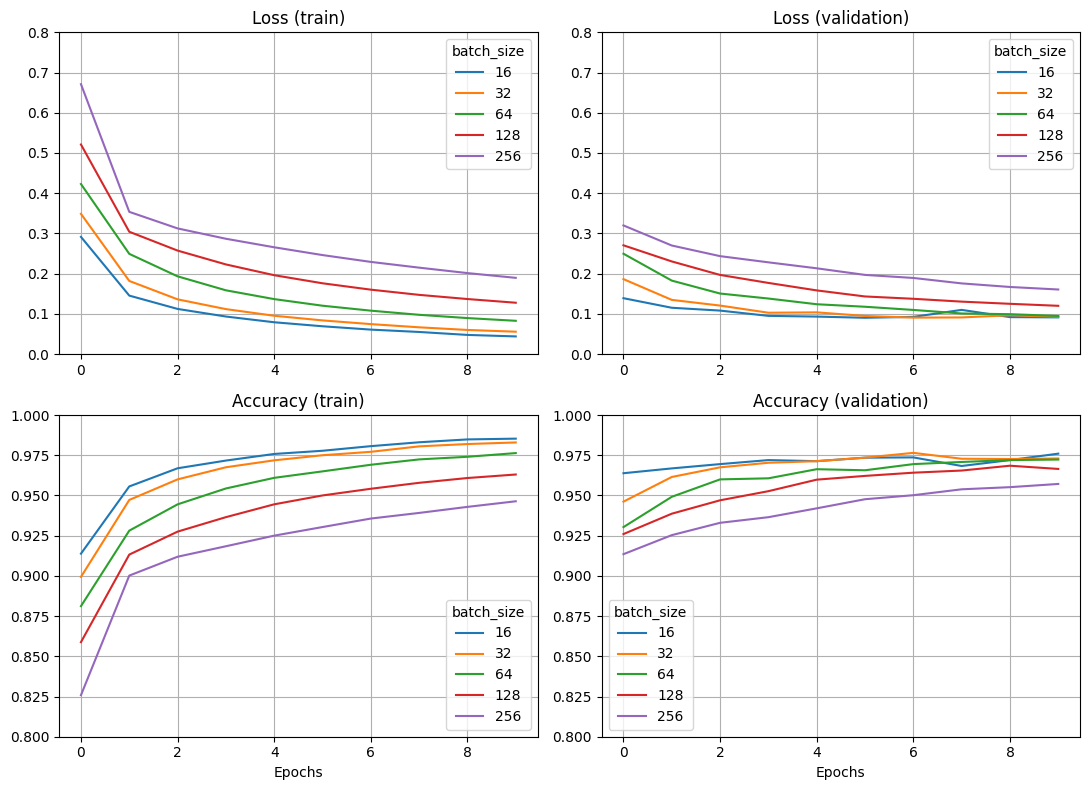

In [ ]:
fig = plt.figure(figsize = (11,8))
ax = plt.subplot(221)
hxs = historydf.xs('loss', axis=1, level='metric')
hxs.plot(ylim=(0,.8), ax=ax)
plt.title("Loss (train)")
plt.grid()

ax = plt.subplot(222)
hxs = historydf.xs('val_loss', axis=1, level='metric')
hxs.plot(ylim=(0,.8), ax=ax)
plt.title("Loss (validation)")
plt.grid()

ax = plt.subplot(223)
hxs = historydf.xs('accuracy', axis=1, level='metric')
hxs.plot(ylim=(0.8,1), ax=ax)
plt.title("Accuracy (train)")
plt.xlabel("Epochs")
plt.grid()

ax = plt.subplot(224)
hxs = historydf.xs('val_accuracy', axis=1, level='metric')
hxs.plot(ylim=(0.8,1), ax=ax)
plt.title("Accuracy (validation)")
plt.xlabel("Epochs")
plt.grid()

plt.tight_layout()
plt.show()

Smaller batches allow for more updates in a single epoch, on the other hand, they take much longer to run a single epoch, so there's a trade-off between speed of training (measured as number of gradients updates) and speed of convergence (measured as number of epochs). In practice a batch size of 16 or 32 data points is often used.

A [recent research article](https://arxiv.org/abs/1711.00489) suggests starting with a small batch size and the increase it gradually. We encourage you to try and experiment with that strategy as well.

##Optimizers in Deep Learning

O **Gradiente Descendente** (GD) e o **Gradiente Descendente Estocástico** (SGD) são dois algoritmos de otimização usados para treinar modelos de aprendizado de máquina. A principal diferença entre eles está na forma como são atualizados os parâmetros do modelo.

Gradiente Descendente (GD):

1. Utiliza todo o conjunto de treinamento para calcular o gradiente.
2. Atualiza os parâmetros após passar por todo o conjunto de treinamento.
3. Requer mais memória e computação.

Gradiente Descendente Estocástico (SGD):

1. Utiliza apenas uma amostra aleatória do conjunto de treinamento para calcular o gradiente.
2. Atualiza os parâmetros após cada amostra.
3. Requer menos memória e computação.

Vantagens do SGD:

1. Maior eficiência computacional.
2. Menor risco de sobreajuste (overfitting).
3. Possibilidade de convergência mais rápida.

Desvantagens do SGD:

1. Maior variância nos resultados.
2. Possibilidade de convergência para mínimos locais.

Quando usar cada um:

1. GD: Conjuntos de treinamento pequenos, problemas de otimização convexas.
2. SGD: Conjuntos de treinamento grandes, problemas de otimização não convexas.

Em resumo, o SGD é mais eficiente e escalável, mas pode ser mais instável. O GD é mais estável, mas pode ser mais lento e requer mais recursos.

###Gradient Descent (GD)
This is the most basic optimizer that directly uses the derivative of the loss function and learning rate to reduce the loss and achieve the minima. This approach is also adopted in backpropagation in neural networks where the updated parameters are shared between different layers depending upon when the minimum loss is achieved. It is easy to implement and interpret the results, but it has various issues.

The weights are updated when the whole dataset gradient is calculated, *which slows down the process*. It also requires a large amount of memory to store this temporary data, making it a resource-hungry process. Though the idea behind this algorithm is well suited, it needs to be tweaked.

###Stochastic Gradient Descent (SGD)
This is a changed version of the GD method, where the model parameters are updated on every iteration. It means that after every training sample, the loss function is tested and the model is updated. These frequent updates result in converging to the minima in less time, but it comes at the cost of increased variance that can make the model overshoot the required position.

But an advantage of this technique is low memory requirement as compared to the previous one because now there is no need to store the previous values of the loss functions.

A gradient descent optimizer may not be the best option for huge data. The stochastic gradient descent (SGD) optimizer tackles this problem. The term “stochastic” implies randomness upon which the algorithm is built upon. Rather than accepting the entire dataset for all iterations, a stochastic gradient allows you to choose the data’s batches randomly. It suggests that you only need to take a few samples from the dataset.

The process of this optimizer in neural network first selects the initial parameters ‘w’ and learning rate ‘n’. The data is then randomly shuffled at every iteration to obtain an approximate minimum.

Instead of the entire dataset, you only take the dataset’s batches for iteration. So, the path adopted by the algorithm consists of noise, unlike the gradient descent algorithm. Hence, SGD uses a higher number of iterations to attain the local minima. The total computation time increases because of an increase in the number of iterations. However, even after raising the number of iterations, the computation expense is still lesser than that of the GD optimizer. So, it concludes that an SGD optimizer in deep learning is preferable if the data is massive and the computational time is significant.

###Mini-Batch Gradient Descent
Another variant of this GD approach is mini-batch, where the model parameters are updated in small batch sizes. It means that after every n batches, the model parameters will be updated and this ensures that the model is proceeding towards minima in fewer steps without getting derailed often. This results in less memory usage and low variance in the model.

Rather than taking the whole training data, Mini-Batch Gradient Descent only takes a subset of the dataset to calculate the loss function. So, fewer iterations are required. Therefore, the mini-batch gradient descent algorithm is comparatively faster than both batch gradient descent and stochastic gradient descent algorithms.

It is more robust and efficient than the former variants of gradient descent algorithms. It uses batching, so all the training data need not be processed on the memory. Hence, this optimizer in neural network makes the process more efficient.

###Momentum Based Gradient Descent
O Momentum Based Gradient Descent (MBGD) é uma variante do algoritmo de Gradiente Descendente (GD) que incorpora o conceito de momentum para melhorar a convergência.

O que é momentum?

O momentum é uma medida da quantidade de movimento ou inércia que o algoritmo possui em uma direção específica. No contexto do MBGD, o momentum é usado para ajudar o algoritmo a superar os mínimos locais e evitar oscilações.

Como funciona o MBGD?

1. Inicialização: O algoritmo começa com um conjunto de parâmetros inicializados aleatoriamente.
2. Cálculo do gradiente: O gradiente do erro é calculado com respeito aos parâmetros.
3. Atualização do momentum: O momentum é atualizado com base no gradiente anterior e no momentum atual.
4. Atualização dos parâmetros: Os parâmetros são atualizados com base no momentum atualizado.

Equação do MBGD:

$$w(t+1) = w(t) - α * ∇E(w(t)) + γ * (w(t) - w(t-1))$$

onde:

- $w(t)$ é o vetor de parâmetros no tempo t
- $α$ é a taxa de aprendizado
- $∇E(w(t))$ é o gradiente do erro no tempo t
- $γ$ é o parâmetro de momentum $(0 < γ < 1)$
- $w(t-1)$ é o vetor de parâmetros no tempo t-1

Vantagens do MBGD:

1. Melhor convergência: O MBGD pode superar os mínimos locais e evitar oscilações.
2. Maior estabilidade: O algoritmo é menos sensível a mudanças bruscas no gradiente.
3. Aceleração da convergência: O MBGD pode convergir mais rapidamente do que o GD.

Desvantagens do MBGD:

1. Maior complexidade: O algoritmo requer mais cálculos e memória.
2. Escolha do parâmetro de momentum: O valor de γ afeta significativamente o desempenho do algoritmo.

Aplicações do MBGD:

1. Otimização de funções não convexas
2. Treinamento de redes neurais
3. Otimização de problemas de otimização grande escala

Let’s revisit the method we are using to update the parameters. Based on the first-order derivative of the loss function, we are back-propagating the gradients. The frequency of updates can be after every iteration, a batch, or at the last, but we are not considering how many updates we have in the parameters.

If this history element is included in the next updates, then it can speed the whole process and this is what momentum means in this optimizer. This history element is like how our mind memorizes things. If you are walking on a street and you cover a pretty large distance, then you will be sure that your destination is some distance ahead and you will increase your speed.

This element depends on the previous value, learning rate, and a new parameter called gamma, which controls this history update. The update rule will be something like $w = w – v$, where v is the history element.

###Nesterov Accelerated Gradient (NAG)
O Nesterov Accelerated Gradient (NAG) é um algoritmo de otimização que combina o conceito de momentum com uma atualização anticipada dos parâmetros, proposto por Yurii Nesterov em 1983.

Equação do NAG:

$$w(t+1) = w(t) - α * ∇E(w(t) + γ * (w(t) - w(t-1))) + γ * (w(t) - w(t-1))$$

onde:

- $w(t)$ é o vetor de parâmetros no tempo t
- $α$ é a taxa de aprendizado
- $∇E(w(t))$ é o gradiente do erro no tempo t
- $γ$ é o parâmetro de momentum $(0 < γ < 1)$
- $w(t-1)$ é o vetor de parâmetros no tempo t-1

Diferenças entre NAG e MBGD:

1. Atualização anticipada: NAG atualiza os parâmetros com base no gradiente calculado no ponto $w(t) + γ * (w(t) - w(t-1))$, enquanto MBGD atualiza com base no gradiente calculado no ponto $w(t)$.
2. Maior estabilidade: NAG é mais estável e menos sensível a mudanças bruscas no gradiente.

Vantagens do NAG:

1. Maior convergência: NAG converge mais rapidamente do que MBGD em muitos casos.
2. Melhor estabilidade: NAG é menos sensível a mudanças bruscas no gradiente.
3. Robustez: NAG é robusto em relação ao ruído no gradiente.

Desvantagens do NAG:

1. Maior complexidade: NAG requer mais cálculos e memória.
2. Escolha do parâmetro de momentum: O valor de γ afeta significativamente o desempenho do algoritmo.

The momentum-based GD gave a boost to the currently used optimizers by converging to the minima at the earliest, but it introduced a new problem. This method takes a lot of u-turns and oscillates in and out in the minima valley adding to the total time. The time taken is still way too less than normal GD, but this issue also needs a fix and this is done in NAG.  

The approach followed here was that the parameters update would be made with the history element first and then only the derivative is calculated which can move it in the forward or backward direction. This is called the look-ahead approach, and it makes more sense because if the curve reaches near to the minima, then the derivative can make it move slowly so that there are fewer oscillations and therefore saving more time.

###AdaGrad (Adaptive Gradient Descent)
AdaGrad (Adaptive Gradient Descent) é um algoritmo de otimização que ajusta a taxa de aprendizado para cada parâmetro individualmente, com base na magnitude do gradiente.

Motivação:

O Gradiente Descendente (GD) tradicional utiliza uma taxa de aprendizado fixa para todos os parâmetros. No entanto, isso pode levar a:

1. Aprendizado lento para parâmetros com gradientes pequenos.
2. Oscilações excessivas para parâmetros com gradientes grandes.

AdaGrad:

1. Inicialização: O algoritmo começa com um conjunto de parâmetros inicializados aleatoriamente.
2. Cálculo do gradiente: O gradiente do erro é calculado com respeito aos parâmetros.
3. Atualização da taxa de aprendizado: A taxa de aprendizado é ajustada para cada parâmetro individualmente, com base na magnitude do gradiente.

Equação do AdaGrad:

$$w(t+1) = w(t) - α * ∇E(w(t)) / \sqrt((G(t) + ε))$$

onde:

- $w(t)$ é o vetor de parâmetros no tempo t
- $α$ é a taxa de aprendizado inicial
- $∇E(w(t))$ é o gradiente do erro no tempo t
- $G(t)$ é a soma acumulada dos quadrados dos gradientes até o tempo t
- $ε$ é um pequeno valor para evitar divisão por zero

Vantagens do AdaGrad:

1. Ajuste automático da taxa de aprendizado.
2. Melhor convergência para problemas com gradientes desbalanceados.
3. Robustez em relação ao ruído no gradiente.

Desvantagens do AdaGrad:

1. Diminuição da taxa de aprendizado ao longo do tempo.
2. Sensibilidade ao valor de α.

Aplicações do AdaGrad:

1. Otimização de funções não convexas.
2. Treinamento de redes neurais.
3. Otimização de problemas de otimização grande escala.

Comparação com outros algoritmos:

1. Gradiente Descendente (GD): AdaGrad ajusta a taxa de aprendizado individualmente.
2. Nesterov Accelerated Gradient (NAG): AdaGrad não utiliza momentum.
3. Adam: AdaGrad é mais simples e não utiliza momentum.

Till now we are only focusing on how the model parameters are affecting our training, but we haven’t talked about the hyper-parameters that are assigned constant value throughout the training. One such important hyper-parameter is **learning rate** and varying this can change the pace of training.

For a sparse feature input where most of the values are zero, we can afford a higher learning rate which will boost the dying gradient resulted from these sparse features. If we have dense data, then we can have slower learning.

The solution for this is to have an adaptive learning rate that can change according to the input provided. Adagrad optimizer tries to offer this adaptiveness by decaying the learning rate in proportion to the updated history of the gradients.

It means that when there are larger updates, the history element is accumulated, and therefore it reduces the learning rate and vice versa. One disadvantage of this approach is that the learning rate decays aggressively and after some time it approaches zero.

It uses unique learning rates for every iteration. The modification in learning rate depends on the variance in the parameters during the training. If the parameters change frequently, the learning rate, too, changes frequently. This change is advantageous because practical datasets include dense and sparse features. Hence, it is impartial to assign the same value of the learning rate for every feature.

One of the key benefits of using Adagrad optimizer in neural networks is that it does not need manual modification of the learning rate. It is more reliable than the gradient descent algorithms and their other variants. Moreover, it attains convergence at a faster speed.

###RMS-Prop (Root Mean Square Propagation)
RMSProp (Root Mean Square Propagation) é um algoritmo de otimização que combina os conceitos de Gradiente Descendente e AdaGrad, proposto por Geoffrey Hinton em 2012.

Motivação:

AdaGrad tem dois problemas principais:

1. Diminuição da taxa de aprendizado ao longo do tempo.
2. Sensibilidade ao valor de α.

RMSProp resolve esses problemas utilizando:

1. Uma média móvel dos quadrados dos gradientes.
2. Uma taxa de aprendizado adaptativa baseada na razão entre a média dos quadrados dos gradientes atuais e anteriores.

Equação do RMSProp:

$$w(t+1) = w(t) - α * ∇E(w(t)) / √(v(t) + ε)$$

onde:

- $w(t)$ é o vetor de parâmetros no tempo t
- $α$ é a taxa de aprendizado inicial
- $∇E(w(t))$ é o gradiente do erro no tempo t
- $v(t)$ é a média móvel dos quadrados dos gradientes até o tempo t
- $ε$ é um pequeno valor para evitar divisão por zero

Atualização da média móvel dos quadrados dos gradientes:

$$v(t) = γ * v(t-1) + (1-γ) * g^2(t)$$

onde:

- $γ$ é o fator de esquecimento $(0 < γ < 1)$
- $g(t)$ é o gradiente no tempo t

Vantagens do RMSProp:

1. Ajuste automático da taxa de aprendizado.
2. Não requer ajuste do parâmetro α.
3. Robustez em relação ao ruído no gradiente.
4. Melhor convergência do que AdaGrad.

Desvantagens do RMSProp:

1. Requer mais memória para armazenar a média móvel dos quadrados dos gradientes.
2. Sensibilidade ao valor de γ.

Aplicações do RMSProp:

1. Otimização de funções não convexas.
2. Treinamento de redes neurais.
3. Otimização de problemas de otimização grande escala.

Comparação com outros algoritmos:

1. AdaGrad: RMSProp resolve os problemas de diminuição da taxa de aprendizado e sensibilidade ao valor de α.
2. AdaDelta: RMSProp é mais robusto em relação ao ruído no gradiente.
3. Adam: RMSProp é mais simples e não requer ajuste do parâmetro α.

RMSProp is an improvement to the Adagrad optimizer. This aims to reduce the aggressiveness of the learning rate by taking an exponential average of the gradients instead of the cumulative sum of squared gradients. Adaptive learning rate remains intact as now exponential average will punish larger learning rate in conditions when there are fewer updates and smaller rate in a higher number of updates.

RPPROP uses the gradient sign to change the step size discretely for each weight. In the RMSProp algorithm, two gradients are first compared based on the signs. If their signs are the same, you proceed in the right direction. So, the step size increases by a small amount. But if their signs are opposite, you need to reduce the step size. Subsequently, you limit the step size and proceed with the weight update.

This algorithm primarily accelerates the optimization process by reducing the number of function estimates to obtain the local minima. It stores the moving average of squared gradients for each weight and divides the gradient by the mean square’s square root. Hence, it is one of those optimizers in deep learning that precisely calculates the gradients.

###AdaDelta
AdaDelta é um acrônimo que significa:

Ada - Adaptativo (do inglês "Adaptive")
Delta - Diferença (do inglês "Delta", que representa a mudança ou diferença)

Portanto, AdaDelta pode ser traduzido como "Diferença Adaptativa".

AdaDelta é um algoritmo de otimização que combina os conceitos de AdaGrad e RMSProp, proposto por Zeiler em 2012.

Motivação:

AdaGrad tem dois problemas principais:

1. Diminuição da taxa de aprendizado ao longo do tempo.
2. Sensibilidade ao valor de α.

AdaDelta resolve esses problemas utilizando:

1. Uma janela deslizante para calcular a média dos quadrados dos gradientes.
2. Uma taxa de aprendizado adaptativa baseada na razão entre a média dos quadrados dos gradientes atuais e anteriores.

Equação do AdaDelta:

$$w(t+1) = w(t) - α * ∇E(w(t)) / √(Et + ε)$$

onde:

- $w(t)$ é o vetor de parâmetros no tempo t
- $α$ é a taxa de aprendizado inicial (não é necessário ajustar)
- $∇E(w(t))$ é o gradiente do erro no tempo t
- $Et$ é a média dos quadrados dos gradientes até o tempo t
- $ε$ é um pequeno valor para evitar divisão por zero

Atualização da média dos quadrados dos gradientes:

$$Et = γ * Et-1 + (1-γ) * g^2(t)$$

onde:

- $γ$ é o fator de esquecimento $(0 < γ < 1)$
- $g(t)$ é o gradiente no tempo t

Vantagens do AdaDelta:

1. Ajuste automático da taxa de aprendizado.
2. Não requer ajuste do parâmetro α.
3. Robustez em relação ao ruído no gradiente.
4. Melhor convergência do que AdaGrad.

Desvantagens do AdaDelta:

1. Requer mais memória para armazenar a média dos quadrados dos gradientes.
2. Sensibilidade ao valor de γ.

Aplicações do AdaDelta:

1. Otimização de funções não convexas.
2. Treinamento de redes neurais.
3. Otimização de problemas de otimização grande escala.

Comparação com outros algoritmos:

1. AdaGrad: AdaDelta resolve os problemas de diminuição da taxa de aprendizado e sensibilidade ao valor de α.
2. RMSProp: AdaDelta é mais robusto em relação ao ruído no gradiente.
3. Adam: AdaDelta é mais simples e não requer ajuste do parâmetro α.

Adadelta is an extension of Adagrad and it also tries to reduce Adagrad’s aggressive, monotonically reducing the learning rate and remove decaying learning rate problem. In Adadelta we do not need to set the default learning rate as we take the ratio of the running average of the previous time steps to the current gradient.

###Adam (Adaptive Moment Estimation)
Adam é um algoritmo de otimização que combina os conceitos de Gradiente Descendente, AdaGrad e RMSProp, proposto por Kingma e Ba em 2014.

Motivação:

Os algoritmos de otimização anteriores tinham problemas de:

1. Diminuição da taxa de aprendizado ao longo do tempo.
2. Sensibilidade ao valor de α.
3. Ruído no gradiente.

Adam resolve esses problemas utilizando:

1. Duas médias móveis: primeira e segunda momentos (m e v).
2. Taxa de aprendizado adaptativa baseada na razão entre a média dos quadrados dos gradientes atuais e anteriores.
3. Correção de viés para evitar subestimação da taxa de aprendizado.

Equações do Adam:

$$m(t) = β1 * m(t-1) + (1-β1) * g(t)$$
$$v(t) = β2 * v(t-1) + (1-β2) * g^2(t)$$

$$w(t+1) = w(t) - α * m(t) / √(v(t) + ε)$$

onde:

- $w(t)$ é o vetor de parâmetros no tempo t
- $α$ é a taxa de aprendizado inicial
- $β1$ e $β2$ são fatores de esquecimento $(0 < β1, β2 < 1)$
- $g(t)$ é o gradiente no tempo t
- $ε$ é um pequeno valor para evitar divisão por zero

Vantagens do Adam:

1. Ajuste automático da taxa de aprendizado.
2. Não requer ajuste do parâmetro α.
3. Robustez em relação ao ruído no gradiente.
4. Melhor convergência do que AdaGrad e RMSProp.

Desvantagens do Adam:

1. Requer mais memória para armazenar as médias móveis.
2. Sensibilidade aos valores de β1 e β2.

Aplicações do Adam:

1. Otimização de funções não convexas.
2. Treinamento de redes neurais.
3. Otimização de problemas de otimização grande escala.

Comparação com outros algoritmos:

1. AdaGrad: Adam resolve os problemas de diminuição da taxa de aprendizado e sensibilidade ao valor de α.
2. RMSProp: Adam é mais robusto em relação ao ruído no gradiente.
3. AdaDelta: Adam é mais complexo, mas oferece melhor desempenho.

Adam combines the power of RMSProp (root-mean-square prop) and momentum-based GD. In Adam optimizers, the power of momentum GD to hold the history of updates and the adaptive learning rate provided by RMSProp makes Adam optimizer a powerful method. It also introduces two new hyper-parameters beta1 and beta2 which are usually kept around 0.9 and 0.99 but you can change them according to your use case.

We then set the learning rate to be the same for each of them and run the training for ten epochs each:

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop, Adadelta
start_time = time.process_time()
dflist = []
opts = ['SGD(learning_rate=0.01)',
        'SGD(learning_rate=0.01, momentum=0.3)',
        'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',
        'Adam(learning_rate=0.01)',
        'Adagrad(learning_rate=0.01)',
        'RMSprop(learning_rate=0.01)',
        'Adadelta(learning_rate=0.01)']

for opt_name in opts:
  inter_time = time.process_time()
  model.compile(optimizer=eval(opt_name), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.set_weights(weights)
  h = model.fit(X_train_sc, y_train, batch_size=64, epochs=10, verbose=0, validation_split=0.1)
  dflist.append(pd.DataFrame(h.history, index=h.epoch))
  print("Done: ", opt_name)
  training_time_s = time.process_time() - inter_time
  training_time_m = training_time_s / 60
  print("Tempo: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

training_time_s = time.process_time() - start_time
training_time_m = training_time_s / 60
print("\nTempo de treinamento total: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

Done:  SGD(learning_rate=0.01)
Tempo: 31.54 segundos (0.53 minutos)
Done:  SGD(learning_rate=0.01, momentum=0.3)
Tempo: 34.42 segundos (0.57 minutos)
Done:  SGD(learning_rate=0.01, momentum=0.3, nesterov=True)
Tempo: 32.13 segundos (0.54 minutos)
Done:  Adam(learning_rate=0.01)
Tempo: 34.52 segundos (0.58 minutos)
Done:  Adagrad(learning_rate=0.01)
Tempo: 33.22 segundos (0.55 minutos)
Done:  RMSprop(learning_rate=0.01)
Tempo: 33.20 segundos (0.55 minutos)
Done:  Adadelta(learning_rate=0.01)
Tempo: 37.52 segundos (0.63 minutos)

Tempo de treinamento total: 236.57 segundos (3.94 minutos)


We can aggregate the results as we did previously:

In [ ]:
historydf = pd.concat(dflist, axis=1)
metrics_ = dflist[0].columns
idx = pd.MultiIndex.from_product([opts, metrics_], names=['optimizers', 'metric'])
historydf.columns = idx

and plot them for comparison:

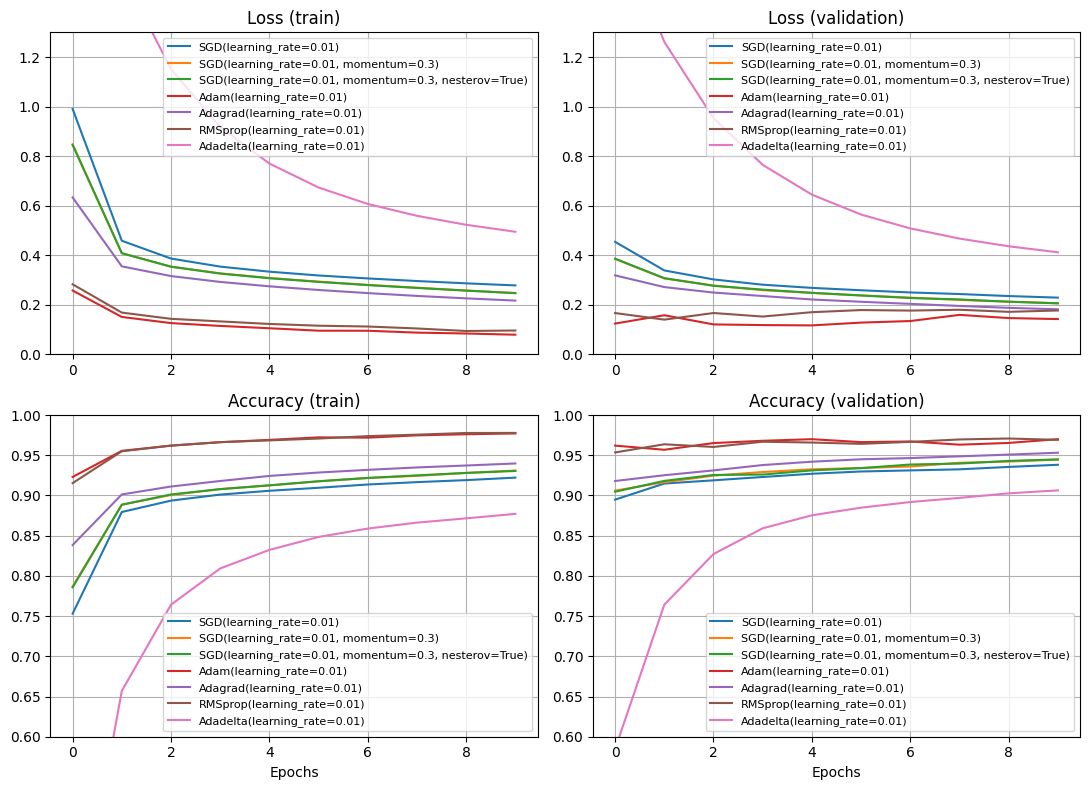

In [ ]:
legend_font = '8'
fig = plt.figure(figsize = (11,8))
ax = plt.subplot(221)
hxs = historydf.xs('loss', axis=1, level='metric')
hxs.plot(ylim=(0,1.3), ax=ax)
plt.title("Loss (train)")
plt.legend(fontsize=legend_font)
plt.grid()

ax = plt.subplot(222)
hxs = historydf.xs('val_loss', axis=1, level='metric')
hxs.plot(ylim=(0,1.3), ax=ax)
plt.title("Loss (validation)")
plt.legend(fontsize=legend_font)
plt.grid()

ax = plt.subplot(223)
hxs = historydf.xs('accuracy', axis=1, level='metric')
hxs.plot(ylim=(0.6,1), ax=ax)
plt.title("Accuracy (train)")
plt.xlabel("Epochs")
plt.legend(fontsize=legend_font)
plt.grid()

ax = plt.subplot(224)
hxs = historydf.xs('val_accuracy', axis=1, level='metric')
hxs.plot(ylim=(0.6,1), ax=ax)
plt.title("Accuracy (validation)")
plt.xlabel("Epochs")
plt.legend(fontsize=legend_font)
plt.grid()

plt.tight_layout()
plt.show()

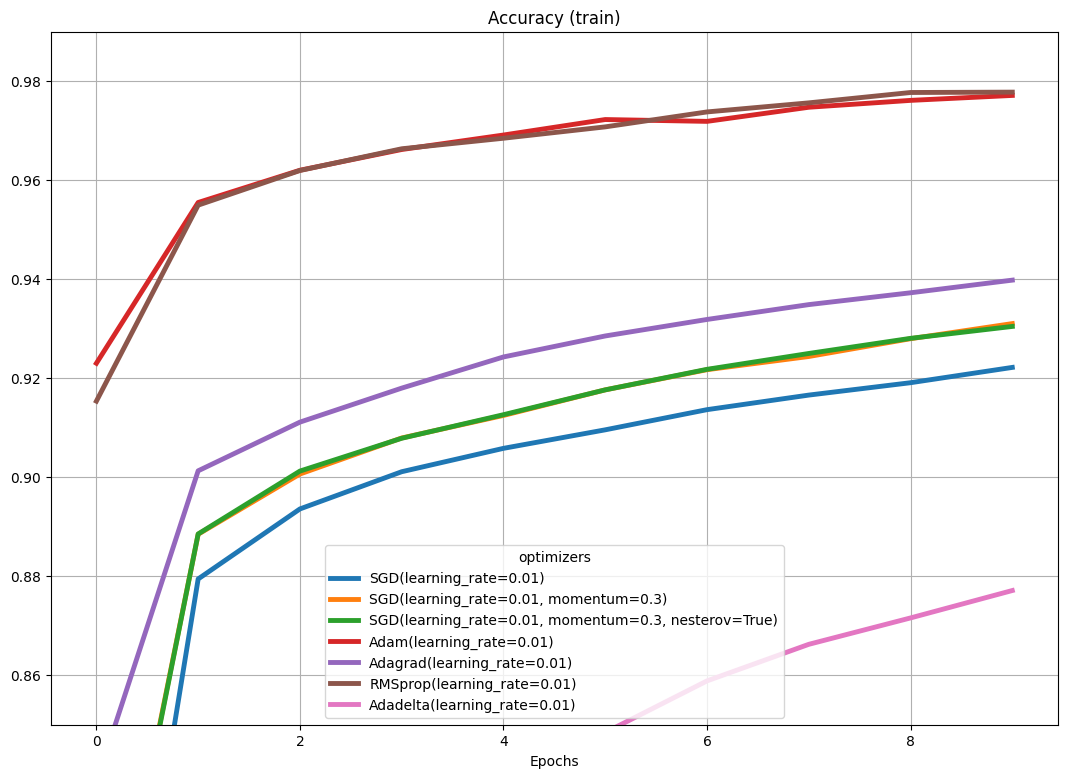

In [ ]:
# olhando os detalhes (zoom) das curvas das acurárias
hxs = historydf.xs('accuracy', axis=1, level='metric')
hxs.plot(ylim=(0.85,.99), figsize = (13,9),linewidth=3.5)
plt.title("Accuracy (train)")
plt.xlabel("Epochs")
plt.grid()
plt.show()

##Weights Initialization
So far we have explored the effect of learning rate, batch size, and optimizers on the speed of convergence of a model. We have compared their effect starting from the same set of randomly initialized weights. What if we initialized weights in a different weight and kept everything else fixed? This may seem unimportant, but it turns out that the initialization is critical. A model could not converge at all for some initialization and converge quickly for some other initialization. While we don't understand this fully, we have a few heuristic strategies available, that we can test, looking for the best one for our specific problem.

`keras` offers the possibility to initialize the weights in several ways including:

- Zeros, ones, constant: all weights initialized to zero, to one or a fixed value. Generally, these are not good choices, because they leave the model uncertain on which parameters to optimize first.

Initialization strategies try to "break the symmetry" by assigning random values to the parameters. The range and type of random distribution can vary, and several initialization schemes have are available:

- *Random uniform*: each weight receives a random value between 0 and 1, chosen with uniform probability.
- *Lecun_uniform*: like the above, but the values are drawn in the interval [-limit, limit] where limit is $\frac{\sqrt{3}}{\textrm{\# inputs}}$. Where $\textrm{\# inputs}$ indicates the number of inputs in the weight tensor for a specific layer.
- *Normal*: each weight receives a random value drawn from a normal distribution with mean 0 and standard deviation of 1.
- *He_normal*: like the previous one, but with standard deviation $\sigma = \sqrt{\frac{2}{\textrm{\# in}}}$.
- *Glorot_normal*: like the previous one, but with standard deviation  $\sigma = \sqrt{\frac{2}{\textrm{\# in} + \textrm{\# out}}}$.

You can read more about them [here](https://keras.io/initializers/). To see the effect of initialization, we'll use a deeper network with more than just five weights.

In [ ]:
dflist = []
start_time = time.process_time()
inits = ['zeros', 'ones', 'uniform', 'lecun_uniform', 'normal', 'he_normal', 'glorot_normal']
for init in inits:
  inter_time = time.process_time()
  K.clear_session()
  model = Sequential()
  model.add(Input((784,)))
  model.add(Dense(units=50, activation='relu', kernel_initializer=init))
  model.add(Dense(10, activation='softmax', kernel_initializer=init))
  model.compile(optimizer='sgd', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  h = model.fit(X_train_sc, y_train, batch_size=64, epochs=10, verbose=0, validation_split=0.1)
  dflist.append(pd.DataFrame(h.history, index=h.epoch))
  print("Done: ", init)
  training_time_s = time.process_time() - inter_time
  training_time_m = training_time_s / 60
  print("Tempo: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

training_time_s = time.process_time() - start_time
training_time_m = training_time_s / 60
print("\nTempo de treinamento total: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

Done:  zeros
Tempo: 32.53 segundos (0.54 minutos)
Done:  ones
Tempo: 31.54 segundos (0.53 minutos)
Done:  uniform
Tempo: 30.91 segundos (0.52 minutos)
Done:  lecun_uniform
Tempo: 30.04 segundos (0.50 minutos)
Done:  normal
Tempo: 31.10 segundos (0.52 minutos)
Done:  he_normal
Tempo: 29.52 segundos (0.49 minutos)
Done:  glorot_normal
Tempo: 29.91 segundos (0.50 minutos)

Tempo de treinamento total: 215.55 segundos (3.59 minutos)


Let's aggregate and plot the results

In [ ]:
historydf = pd.concat(dflist, axis=1)
metrics_ = dflist[0].columns
idx = pd.MultiIndex.from_product([inits, metrics_], names=['initializers', 'metric'])
historydf.columns = idx

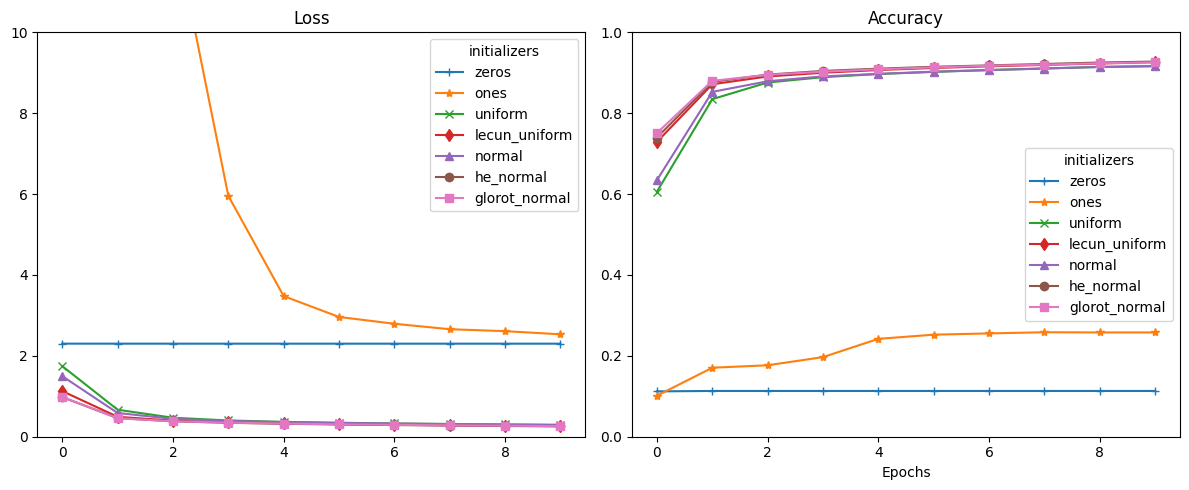

In [ ]:
styles = ['-+', '-*', '-x', '-d', '-^', '-o', '-s']
plt.figure(figsize=(12, 5))

ax = plt.subplot(121)
xs = historydf.xs('loss', axis=1, level='metric')
xs.plot(ylim=(0,10), ax=ax, style=styles)
plt.title("Loss")

ax = plt.subplot(122)
xs = historydf.xs('accuracy', axis=1, level='metric')
xs.plot(ylim=(0,1), ax=ax, style=styles)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()
plt.show()

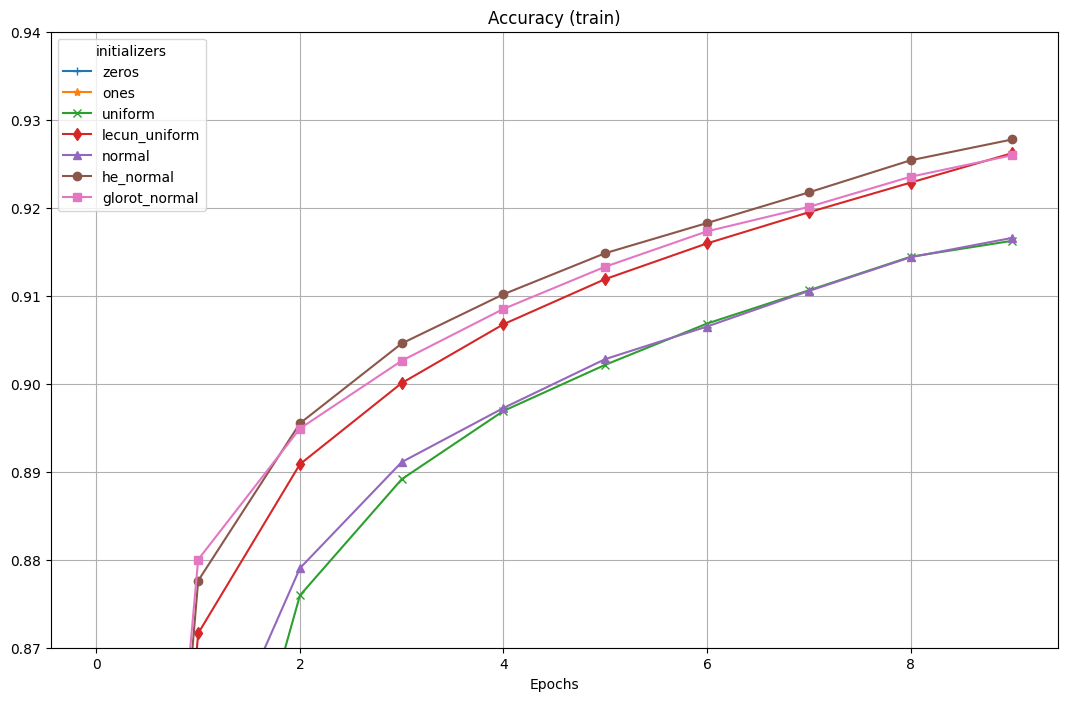

In [ ]:
# olhando com detalhes as curvas das acurárias
styles = ['-+', '-*', '-x', '-d', '-^', '-o', '-s']
xs = historydf.xs('accuracy', axis=1, level='metric')
xs.plot(ylim=(0.87,0.94), style=styles, linewidth=1.5, figsize=(13, 8))
plt.title("Accuracy (train)")
plt.xlabel("Epochs")
plt.grid()
plt.show()

As you can see some initializations don't even converge, while some do converge rather quickly. Initialization of the weights plays a significant role in large models, so it is important to try a couple of different initialization schemes to get the best results.

## Predições

Pode-se, ainda, utilizar
o modelo para predizer um valor a partir de uma imagem sem rótulo por meio do método
“.*predict*”.

In [ ]:
# utilizando o modelo para fazer as predições
prediction = model.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


O resultado das predições nesta rede neural em que se utiliza a função loss='*categorical_crossentropy*' são valores estatísticos, onde o maior valor é a maior probabilidade de reultado positivo. Assim, como os labels do banco de dados vão de 0 à 9, a posição de maior valor numérico nas linhas da matriz de predição vão indicar o label correspondente, como maior probalidade de acerto.

In [ ]:
amostra = 0;
print('y_prediction[amostra] =', prediction[amostra])
print('Soma dos valores de predição da amostra:', prediction[amostra].sum())
print('Posição do maior valor numérico:', prediction[amostra].argmax())
print('Probalidade de acerto: %.3f%%' %(prediction[amostra].max()*100))
print('Label y_test[amostra] =', y_test[amostra])

y_prediction[amostra] = [0.         0.         0.         0.         0.         0.
 0.         0.99999994 0.         0.        ]
Soma dos valores de predição da amostra: 0.99999994
Posição do maior valor numérico: 7
Probalidade de acerto: 100.000%
Label y_test[amostra] = 7


In [ ]:
y_predict = np.argmax(prediction,axis=1)
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 27.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
# matriz de confusão simples
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predict)
print(confusion)

[[ 961    0    0    2    0    0    9    1    7    0]
 [   0 1098    4    4    0    0    3    1   24    1]
 [   8    2  930   20   11    0   10    8   36    7]
 [   1    0   13  954    0    5    2    8   21    6]
 [   1    1    3    2  910    0   13    2   11   39]
 [  12    1    7   58    9  738   16    5   38    8]
 [  11    3    6    2    8    5  917    1    5    0]
 [   4    6   28    9    7    0    0  929    7   38]
 [   7    2    4   24    6    3    8    7  908    5]
 [  12    3    1   15   23    0    1    8   14  932]]


In [ ]:
# função para visualização de uma forma elegante da matriz de confusão
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (13,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

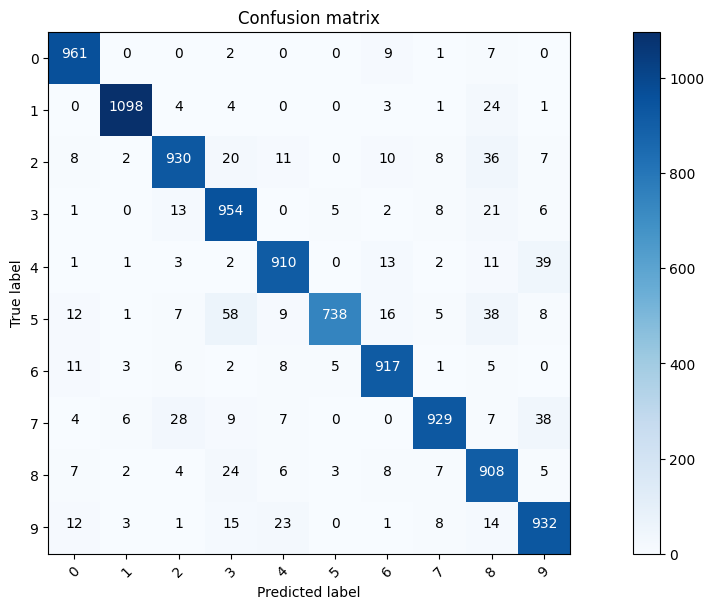

In [ ]:
plot_confusion_matrix(confusion, classes = range(10))

In [ ]:
!pip install scikit-learn
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop, Adadelta
#print(classification_report(y_test, y_predict))


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
# função para visualização das predições (examples: 28*28 pixels)
def show_predict_ex2(examples, targets, predict_):
    init = 0
    plt.figure(figsize=(10, 10))

    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.imshow(examples[init + i], cmap='Greys')
        plt.xlabel(f'y: {targets[init + i]} - ŷ: {predict_[init + i]}', size = 9)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()

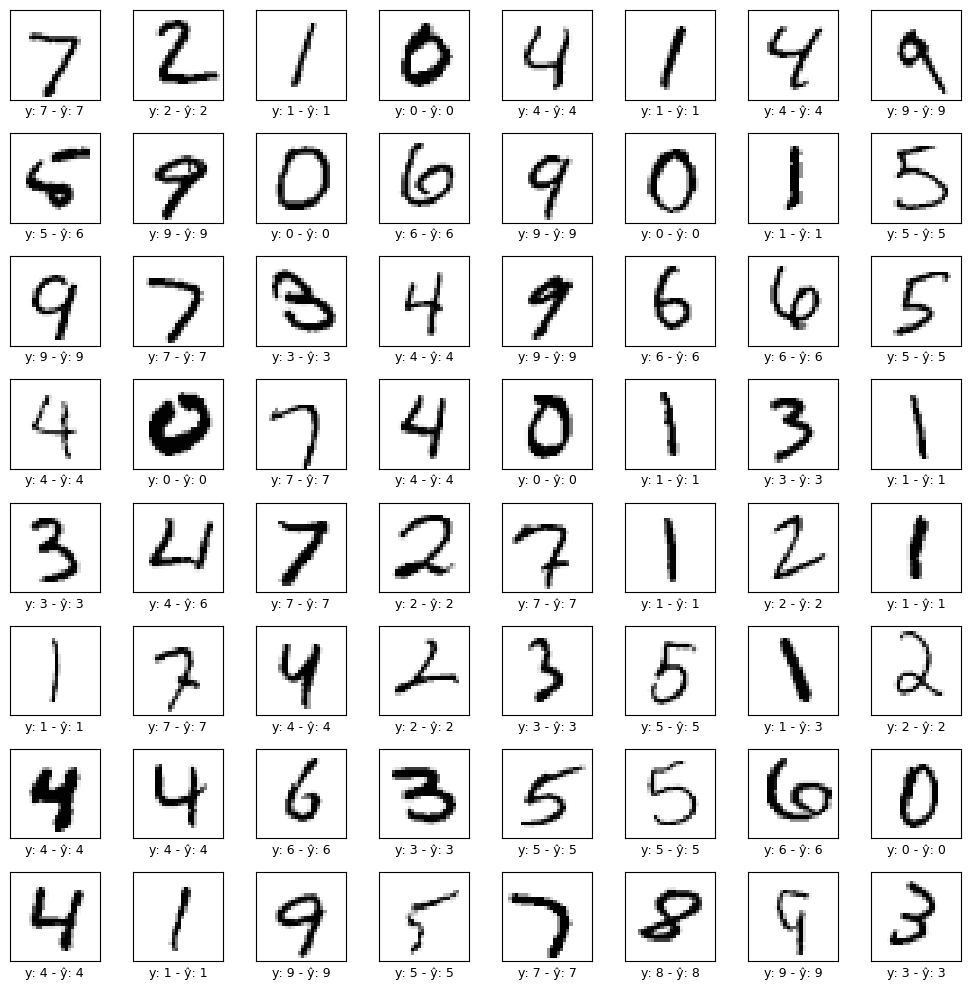

In [ ]:
# as primeiras amostras de imagens do banco de dados de teste com suas predições
show_predict_ex2(X_test, y_test, y_predict)

# Predições com novos dígitos

Podemos fazer o teste na nossa rede, para ver se vai predizer corretamente os dígitos que nós escrevermos. Para isso, utilize Paint e escreva números de 0 a 9. Salve no drive (0.png, 1.png, ..., 9.png) e rode novamente a predição para verificar se a rede treinada consegue predizer corretamente os novos dígitos.

In [ ]:
!unzip - Colab\ Notebooks-20250117T154131Z-001.zip

Archive:  Colab Notebooks-20250117T154131Z-001.zip
   creating: Colab Notebooks/.ipynb_checkpoints/
  inflating: Colab Notebooks/Atv_27_MauricioNoris.ipynb  
  inflating: Colab Notebooks/Untitled0.ipynb  
  inflating: Colab Notebooks/Atv_25_MauricioNoris.ipynb  
  inflating: Colab Notebooks/Atv_26_MauricioNoris_v2.ipynb  
  inflating: Colab Notebooks/Cópia de Atv_22_MauricioNoris.ipynb  
  inflating: Colab Notebooks/search_ieee_xplore.ipynb  
  inflating: Colab Notebooks/ISAC3.ipynb  
  inflating: Colab Notebooks/parsing.ipynb  
  inflating: Colab Notebooks/Atv_24_MauricioNoris.ipynb  
  inflating: Colab Notebooks/[PROJETO I] - Machine Learning Classifiers_MauricioNoris.ipynb  
  inflating: Colab Notebooks/Cópia de [PROJETO I] - Machine Learning Classifiers_MauricioNoris.ipynb  
  inflating: Colab Notebooks/Atv_22_MauricioNoris.ipynb  
  inflating: Colab Notebooks/Atv_23_MauricioNoris.ipynb  
  inflating: Colab Notebooks/Cópia de Feedfoward  Neural  Network [MNIST Classification] - Dee

In [ ]:
from numpy import asarray
from PIL import Image
# Local  das imagens de 10 dígitos feitos no paint (0.png, 1.png...., 9.png)
#path='/content/drive/MyDrive/Colab Notebooks/images/'
path='Colab Notebooks/images/'
# Crio uma cópia nova do banco de dados de teste, sem que aponte para o mesmo objecto:
X_test_new = np.copy(X_test)
X_test_flat_new = np.copy(X_test_flat)
X_train_sc_new = np.copy(X_train_sc)
y_test_new = np.copy(y_test)
# Carregando as imagens (0.png, 1.png...., 9.png)
for i in range(10):
  img_num=str(i)+'.png'
  img1=Image.open(path + img_num)
  img1.thumbnail((28,28))
  img2=img1.convert(mode='L')
  img3=asarray(img2)
  img3 = 255 - img3
  # salvo as 10 imagens novas nas primeiras posições de X_test_new
  X_test_new[i] = img3
  X_test_flat_new[i] = X_test_new[i].reshape(-1, 28*28)
  X_train_sc_new[i] = X_test_flat_new[i] / 255
  y_test_new[i] = i

A figura mostra a predição dos dígitos criados e inseridos no banco de dados de teste.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


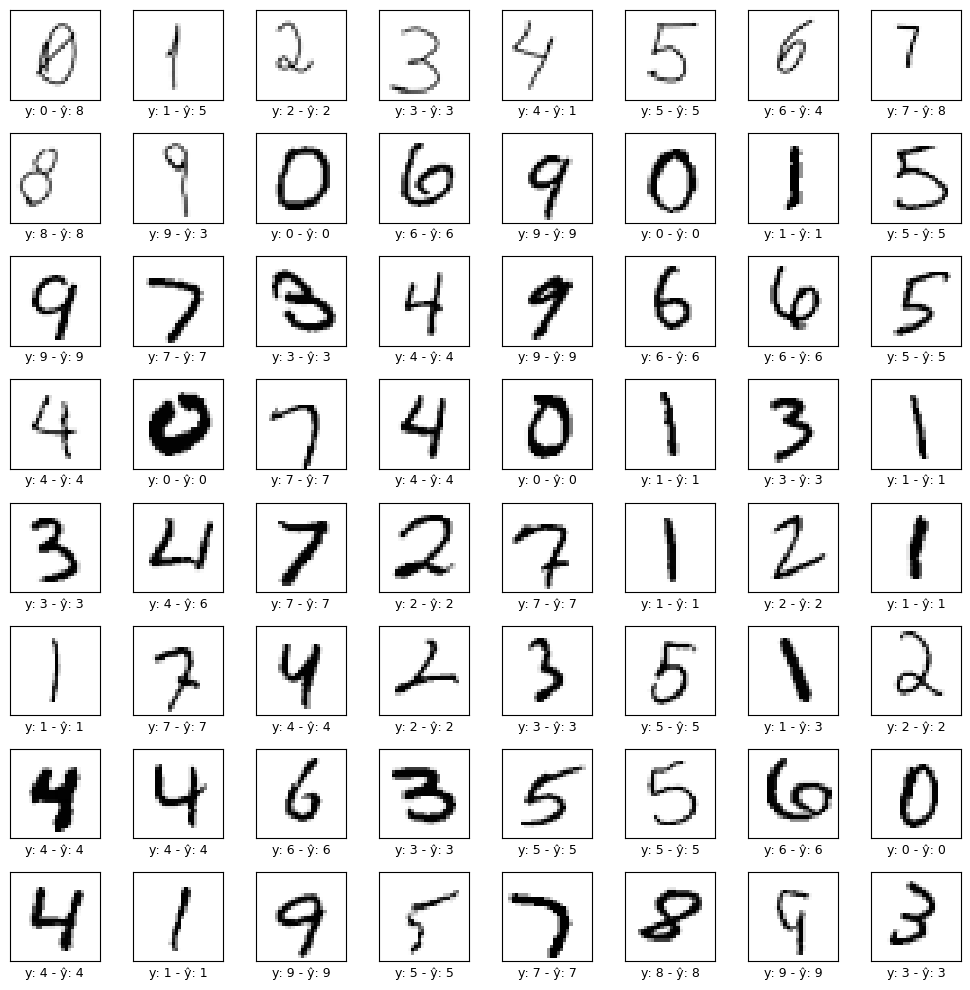

In [ ]:
# predição dos 10 dígitos feitos no paint
prediction_new = model.predict(X_test_flat_new)
y_predict_new = np.argmax(prediction_new,axis=1)
show_predict_ex2(X_test_new, y_test_new, y_predict_new)

In [ ]:
# verificando a probabilidade de acerto/erro da previsão
amostra = 9;
print('y_predict_new[amostra] =', prediction_new[amostra])
print('Soma dos valores de predição da amostra:', prediction_new[amostra].sum())
print('Posição do maior valor numérico:', prediction_new[amostra].argmax())
print('Probalidade de acerto: %.3f%%' %(prediction_new[amostra].max()*100))
print('Label y_test_new[amostra] =', y_test_new[amostra])

y_predict_new[amostra] = [0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999994e-01 0.0000000e+00
 0.0000000e+00 0.0000000e+00 6.0444275e-38 0.0000000e+00 0.0000000e+00]
Soma dos valores de predição da amostra: 0.99999994
Posição do maior valor numérico: 3
Probalidade de acerto: 100.000%
Label y_test_new[amostra] = 9


## Exercises
1) Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise, we'll explore a few of them.

- build a deep fully connected network with the following structure:
    - Input Layer: 784 nodes
    - Hidden Layer 1: 200 nodes
    - Hidden Layer 2: 100 nodes
    - Output Layer: 10 nodes
- choose activation functions, initializations, optimizer, learning rate and batch size so that it best converges to 100% accuracy (training and validation dataset) within 20 epochs (not easy)
- remember to train the model on the scaled data
- train the model on the train data using `validation_data=0.1`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is over

2) Monte um banco de dados com 50 amostras de dígitos feitos no papel branco com caneta marcadora preto, escritos por 5 pessoas distintas. Fotografe as amostras e retrabalhe a imagem, retirando somente a área do dígito e deixando-a no formato quadrado 500x500 pixels. Teste as predições do seu banco de testes com a rede em sua melhor configuração e sintonia. Tire suas conclusões.

# Referências

[1] https://www.deeplearningbook.com.br/algoritmo-backpropagation-parte-2-treinamento-de-redes-neurais/

[2] https://www.upgrad.com/blog/types-of-optimizers-in-deep-learning/

[3] https://medium.com/mlearning-ai/optimizers-in-deep-learning-7bf81fed78a0

[4] https://www.scaler.com/topics/deep-learning/optimizers-in-deep-learning/

[5] Mosconi, Francesco. *Zero to Deep Learning*. Catalit LLC, 2019.

[6] https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

[7] https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras

[8] https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3

[9] https://www.kaggle.com/code/heeraldedhia/mnist-classifier-first-deep-learning-project

[10] https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

[11] https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

# Respostas

In [ ]:
import tensorflow.keras as KK

my_callbacks = [

  KK.callbacks.EarlyStopping(patience=2),
  KK.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras')
]

def build_nn(af, init):

  # Arquitetura da rede para os testes iniciais
  # inicializa a sessão
  K.clear_session()
  # inicialização do modelo
  nn = Sequential(name='rede1')
  # camada de entrada = 784 neurônios
  nn.add(Input((784,), name='input'))

  nn.add(Dense(units = 200, activation = af, kernel_initializer = init, name='layer1'))
  nn.add(Dense(units = 100, activation = af, kernel_initializer = init, name='layer2'))

  # camada de saída
  nn.add(Dense(10, activation='softmax', name='output'))
  # sumário do modelo da rede
  nn.summary()

  return nn

def compile_nn(nn, optimizer, eta):

  nn.compile(optimizer = eval(optimizer), loss = 'sparse_categorical_crossentropy',  metrics=['accuracy'])
  nn.summary()

  return nn


def train_nn(nn, bs, ep):

  h = nn.fit(X_train_sc, y_train, batch_size=bs, epochs=ep, verbose=0, validation_split=0.1,  callbacks=my_callbacks)

  return h, nn


def display():

  return True




In [ ]:
# função para visualização das predições (examples: 28*28 pixels)
def show_predict_ex2(examples, targets, predict_):
    init = 0
    plt.figure(figsize=(12, 12))

    for i in range(50):
        plt.subplot(10, 5, i+1)
        plt.imshow(examples[init + i], cmap='Greys')
        plt.xlabel(f'{targets[init + i]} / {predict_[init + i]}', size = 8)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()

In [ ]:
'''
1) Keras offers the possibility to call a function at each epoch. These are Callbacks, and their documentation is here. Callbacks allow us to add some neat functionality. In this exercise, we'll explore a few of them.

  build a deep fully connected network with the following structure:
  Input Layer: 784 nodes
  Hidden Layer 1: 200 nodes
  Hidden Layer 2: 100 nodes
  Output Layer: 10 nodes
  choose activation functions, initializations, optimizer, learning rate and batch size so that it best converges to 100% accuracy (training and validation dataset) within 20 epochs (not easy)
  remember to train the model on the scaled data
  train the model on the train data using validation_data=0.1
  Use the EarlyStopping callback to stop your training if the val_loss doesn't improve
  Use the ModelCheckpoint callback to save the trained model to disk once training is over
'''
# para medição do tempo de treinamento
import time
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop, Adadelta
# load pickle module
import pickle


topology = {'layers': []}

grid_search = {
                'activation_function': ['relu','tanh'],
                'init'               : ['uniform',  'lecun_uniform', 'normal', 'he_normal', 'glorot_normal'],
                'optimizer'          : [ 'SGD(learning_rate=eta)','SGD(learning_rate=eta, momentum=0.3)', 'SGD(learning_rate=eta, momentum=0.3, nesterov=True)', 'Adam(learning_rate=eta)', 'Adagrad(learning_rate=eta)', 'RMSprop(learning_rate=eta)',  'Adadelta(learning_rate=eta)' ],
                'learning_rate'      : [0.01, 0.1, 0.2],
                'batch_size'         : [ 64  , 128, 256]
              }

epochs = 20

nnn = {}


for af in grid_search['activation_function']:
  for init in grid_search['init']:

    nn = build_nn(af, init)
    for i, optimizer in enumerate(grid_search['optimizer']):
      for eta in grid_search['learning_rate']:
        nn = compile_nn(nn,optimizer, eta)
        for bs in grid_search['batch_size']:
          k = str(af) + '_' + str(init) + '_' + str(i) + '_' + str(eta) + '_' + str(bs)
          print(k)
          h, nn = train_nn(nn, bs, epochs)
          nnn[k] = {'nn':nn, 'h': h}




# create a binary pickle file
f = open("nnn.pkl","wb")
# write the python object (dict) to pickle file
pickle.dump(nnn, f)
# close file
f.close()




Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_0_0.01_64
relu_uniform_0_0.01_128
relu_uniform_0_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_0_0.1_64
relu_uniform_0_0.1_128
relu_uniform_0_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_0_0.2_64
relu_uniform_0_0.2_128
relu_uniform_0_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_1_0.01_64
relu_uniform_1_0.01_128
relu_uniform_1_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_1_0.1_64
relu_uniform_1_0.1_128
relu_uniform_1_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_1_0.2_64
relu_uniform_1_0.2_128
relu_uniform_1_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_2_0.01_64
relu_uniform_2_0.01_128
relu_uniform_2_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_2_0.1_64
relu_uniform_2_0.1_128
relu_uniform_2_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_2_0.2_64
relu_uniform_2_0.2_128
relu_uniform_2_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_3_0.01_64
relu_uniform_3_0.01_128
relu_uniform_3_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_3_0.1_64
relu_uniform_3_0.1_128
relu_uniform_3_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_3_0.2_64
relu_uniform_3_0.2_128
relu_uniform_3_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_4_0.01_64
relu_uniform_4_0.01_128
relu_uniform_4_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_4_0.1_64
relu_uniform_4_0.1_128
relu_uniform_4_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_4_0.2_64
relu_uniform_4_0.2_128
relu_uniform_4_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_5_0.01_64
relu_uniform_5_0.01_128
relu_uniform_5_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_5_0.1_64
relu_uniform_5_0.1_128
relu_uniform_5_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_5_0.2_64
relu_uniform_5_0.2_128
relu_uniform_5_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_6_0.01_64
relu_uniform_6_0.01_128
relu_uniform_6_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_6_0.1_64
relu_uniform_6_0.1_128
relu_uniform_6_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_uniform_6_0.2_64
relu_uniform_6_0.2_128
relu_uniform_6_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_0_0.01_64
relu_lecun_uniform_0_0.01_128
relu_lecun_uniform_0_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_0_0.1_64
relu_lecun_uniform_0_0.1_128
relu_lecun_uniform_0_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_0_0.2_64
relu_lecun_uniform_0_0.2_128
relu_lecun_uniform_0_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_1_0.01_64
relu_lecun_uniform_1_0.01_128
relu_lecun_uniform_1_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_1_0.1_64
relu_lecun_uniform_1_0.1_128
relu_lecun_uniform_1_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_1_0.2_64
relu_lecun_uniform_1_0.2_128
relu_lecun_uniform_1_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_2_0.01_64
relu_lecun_uniform_2_0.01_128
relu_lecun_uniform_2_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_2_0.1_64
relu_lecun_uniform_2_0.1_128
relu_lecun_uniform_2_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_2_0.2_64
relu_lecun_uniform_2_0.2_128
relu_lecun_uniform_2_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_3_0.01_64
relu_lecun_uniform_3_0.01_128
relu_lecun_uniform_3_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_3_0.1_64
relu_lecun_uniform_3_0.1_128
relu_lecun_uniform_3_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_3_0.2_64
relu_lecun_uniform_3_0.2_128
relu_lecun_uniform_3_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_4_0.01_64
relu_lecun_uniform_4_0.01_128
relu_lecun_uniform_4_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_4_0.1_64
relu_lecun_uniform_4_0.1_128
relu_lecun_uniform_4_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_4_0.2_64
relu_lecun_uniform_4_0.2_128
relu_lecun_uniform_4_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_5_0.01_64
relu_lecun_uniform_5_0.01_128
relu_lecun_uniform_5_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_5_0.1_64
relu_lecun_uniform_5_0.1_128
relu_lecun_uniform_5_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_5_0.2_64
relu_lecun_uniform_5_0.2_128
relu_lecun_uniform_5_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_6_0.01_64
relu_lecun_uniform_6_0.01_128
relu_lecun_uniform_6_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_6_0.1_64
relu_lecun_uniform_6_0.1_128
relu_lecun_uniform_6_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_lecun_uniform_6_0.2_64
relu_lecun_uniform_6_0.2_128
relu_lecun_uniform_6_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_0_0.01_64
relu_normal_0_0.01_128
relu_normal_0_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_0_0.1_64
relu_normal_0_0.1_128
relu_normal_0_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_0_0.2_64
relu_normal_0_0.2_128
relu_normal_0_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_1_0.01_64
relu_normal_1_0.01_128
relu_normal_1_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_1_0.1_64
relu_normal_1_0.1_128
relu_normal_1_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_1_0.2_64
relu_normal_1_0.2_128
relu_normal_1_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_2_0.01_64
relu_normal_2_0.01_128
relu_normal_2_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_2_0.1_64
relu_normal_2_0.1_128
relu_normal_2_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_2_0.2_64
relu_normal_2_0.2_128
relu_normal_2_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_3_0.01_64
relu_normal_3_0.01_128
relu_normal_3_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_3_0.1_64
relu_normal_3_0.1_128
relu_normal_3_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_3_0.2_64
relu_normal_3_0.2_128
relu_normal_3_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_4_0.01_64
relu_normal_4_0.01_128
relu_normal_4_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_4_0.1_64
relu_normal_4_0.1_128
relu_normal_4_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_4_0.2_64
relu_normal_4_0.2_128
relu_normal_4_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_5_0.01_64
relu_normal_5_0.01_128
relu_normal_5_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_5_0.1_64
relu_normal_5_0.1_128
relu_normal_5_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_5_0.2_64
relu_normal_5_0.2_128
relu_normal_5_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_6_0.01_64
relu_normal_6_0.01_128
relu_normal_6_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_6_0.1_64
relu_normal_6_0.1_128
relu_normal_6_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_normal_6_0.2_64
relu_normal_6_0.2_128
relu_normal_6_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_0_0.01_64
relu_he_normal_0_0.01_128
relu_he_normal_0_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_0_0.1_64
relu_he_normal_0_0.1_128
relu_he_normal_0_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_0_0.2_64
relu_he_normal_0_0.2_128
relu_he_normal_0_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_1_0.01_64
relu_he_normal_1_0.01_128
relu_he_normal_1_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_1_0.1_64
relu_he_normal_1_0.1_128
relu_he_normal_1_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_1_0.2_64
relu_he_normal_1_0.2_128
relu_he_normal_1_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_2_0.01_64
relu_he_normal_2_0.01_128
relu_he_normal_2_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_2_0.1_64
relu_he_normal_2_0.1_128
relu_he_normal_2_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_2_0.2_64
relu_he_normal_2_0.2_128
relu_he_normal_2_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_3_0.01_64
relu_he_normal_3_0.01_128
relu_he_normal_3_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_3_0.1_64
relu_he_normal_3_0.1_128
relu_he_normal_3_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_3_0.2_64
relu_he_normal_3_0.2_128
relu_he_normal_3_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_4_0.01_64
relu_he_normal_4_0.01_128
relu_he_normal_4_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_4_0.1_64
relu_he_normal_4_0.1_128
relu_he_normal_4_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_4_0.2_64
relu_he_normal_4_0.2_128
relu_he_normal_4_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_5_0.01_64
relu_he_normal_5_0.01_128
relu_he_normal_5_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_5_0.1_64
relu_he_normal_5_0.1_128
relu_he_normal_5_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_5_0.2_64
relu_he_normal_5_0.2_128
relu_he_normal_5_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_6_0.01_64
relu_he_normal_6_0.01_128
relu_he_normal_6_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_6_0.1_64
relu_he_normal_6_0.1_128
relu_he_normal_6_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_he_normal_6_0.2_64
relu_he_normal_6_0.2_128
relu_he_normal_6_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_0_0.01_64
relu_glorot_normal_0_0.01_128
relu_glorot_normal_0_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_0_0.1_64
relu_glorot_normal_0_0.1_128
relu_glorot_normal_0_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_0_0.2_64
relu_glorot_normal_0_0.2_128
relu_glorot_normal_0_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_1_0.01_64
relu_glorot_normal_1_0.01_128
relu_glorot_normal_1_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_1_0.1_64
relu_glorot_normal_1_0.1_128
relu_glorot_normal_1_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_1_0.2_64
relu_glorot_normal_1_0.2_128
relu_glorot_normal_1_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_2_0.01_64
relu_glorot_normal_2_0.01_128
relu_glorot_normal_2_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_2_0.1_64
relu_glorot_normal_2_0.1_128
relu_glorot_normal_2_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_2_0.2_64
relu_glorot_normal_2_0.2_128
relu_glorot_normal_2_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_3_0.01_64
relu_glorot_normal_3_0.01_128
relu_glorot_normal_3_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_3_0.1_64
relu_glorot_normal_3_0.1_128
relu_glorot_normal_3_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_3_0.2_64
relu_glorot_normal_3_0.2_128
relu_glorot_normal_3_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_4_0.01_64
relu_glorot_normal_4_0.01_128
relu_glorot_normal_4_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_4_0.1_64
relu_glorot_normal_4_0.1_128
relu_glorot_normal_4_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_4_0.2_64
relu_glorot_normal_4_0.2_128
relu_glorot_normal_4_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_5_0.01_64
relu_glorot_normal_5_0.01_128
relu_glorot_normal_5_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_5_0.1_64
relu_glorot_normal_5_0.1_128
relu_glorot_normal_5_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_5_0.2_64
relu_glorot_normal_5_0.2_128
relu_glorot_normal_5_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_6_0.01_64
relu_glorot_normal_6_0.01_128
relu_glorot_normal_6_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_6_0.1_64
relu_glorot_normal_6_0.1_128
relu_glorot_normal_6_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

relu_glorot_normal_6_0.2_64
relu_glorot_normal_6_0.2_128
relu_glorot_normal_6_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_0_0.01_64
tanh_uniform_0_0.01_128
tanh_uniform_0_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_0_0.1_64
tanh_uniform_0_0.1_128
tanh_uniform_0_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_0_0.2_64
tanh_uniform_0_0.2_128
tanh_uniform_0_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_1_0.01_64
tanh_uniform_1_0.01_128
tanh_uniform_1_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_1_0.1_64
tanh_uniform_1_0.1_128
tanh_uniform_1_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_1_0.2_64
tanh_uniform_1_0.2_128
tanh_uniform_1_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_2_0.01_64
tanh_uniform_2_0.01_128
tanh_uniform_2_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_2_0.1_64
tanh_uniform_2_0.1_128
tanh_uniform_2_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_2_0.2_64
tanh_uniform_2_0.2_128
tanh_uniform_2_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_3_0.01_64
tanh_uniform_3_0.01_128
tanh_uniform_3_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_3_0.1_64
tanh_uniform_3_0.1_128
tanh_uniform_3_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_3_0.2_64
tanh_uniform_3_0.2_128
tanh_uniform_3_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_4_0.01_64
tanh_uniform_4_0.01_128
tanh_uniform_4_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_4_0.1_64
tanh_uniform_4_0.1_128
tanh_uniform_4_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_4_0.2_64
tanh_uniform_4_0.2_128
tanh_uniform_4_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_5_0.01_64
tanh_uniform_5_0.01_128
tanh_uniform_5_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_5_0.1_64
tanh_uniform_5_0.1_128
tanh_uniform_5_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_5_0.2_64
tanh_uniform_5_0.2_128
tanh_uniform_5_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_6_0.01_64
tanh_uniform_6_0.01_128
tanh_uniform_6_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_6_0.1_64
tanh_uniform_6_0.1_128
tanh_uniform_6_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_uniform_6_0.2_64
tanh_uniform_6_0.2_128
tanh_uniform_6_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_0_0.01_64
tanh_lecun_uniform_0_0.01_128
tanh_lecun_uniform_0_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_0_0.1_64
tanh_lecun_uniform_0_0.1_128
tanh_lecun_uniform_0_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_0_0.2_64
tanh_lecun_uniform_0_0.2_128
tanh_lecun_uniform_0_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_1_0.01_64
tanh_lecun_uniform_1_0.01_128
tanh_lecun_uniform_1_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_1_0.1_64
tanh_lecun_uniform_1_0.1_128
tanh_lecun_uniform_1_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_1_0.2_64
tanh_lecun_uniform_1_0.2_128
tanh_lecun_uniform_1_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_2_0.01_64
tanh_lecun_uniform_2_0.01_128
tanh_lecun_uniform_2_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_2_0.1_64
tanh_lecun_uniform_2_0.1_128
tanh_lecun_uniform_2_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_2_0.2_64
tanh_lecun_uniform_2_0.2_128
tanh_lecun_uniform_2_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_3_0.01_64
tanh_lecun_uniform_3_0.01_128
tanh_lecun_uniform_3_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_3_0.1_64
tanh_lecun_uniform_3_0.1_128
tanh_lecun_uniform_3_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_3_0.2_64
tanh_lecun_uniform_3_0.2_128
tanh_lecun_uniform_3_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_4_0.01_64
tanh_lecun_uniform_4_0.01_128
tanh_lecun_uniform_4_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_4_0.1_64
tanh_lecun_uniform_4_0.1_128
tanh_lecun_uniform_4_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_4_0.2_64
tanh_lecun_uniform_4_0.2_128
tanh_lecun_uniform_4_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_5_0.01_64
tanh_lecun_uniform_5_0.01_128
tanh_lecun_uniform_5_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_5_0.1_64
tanh_lecun_uniform_5_0.1_128
tanh_lecun_uniform_5_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_5_0.2_64
tanh_lecun_uniform_5_0.2_128
tanh_lecun_uniform_5_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_6_0.01_64
tanh_lecun_uniform_6_0.01_128
tanh_lecun_uniform_6_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_6_0.1_64
tanh_lecun_uniform_6_0.1_128
tanh_lecun_uniform_6_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_lecun_uniform_6_0.2_64
tanh_lecun_uniform_6_0.2_128
tanh_lecun_uniform_6_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_0_0.01_64
tanh_normal_0_0.01_128
tanh_normal_0_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_0_0.1_64
tanh_normal_0_0.1_128
tanh_normal_0_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_0_0.2_64
tanh_normal_0_0.2_128
tanh_normal_0_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_1_0.01_64
tanh_normal_1_0.01_128
tanh_normal_1_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_1_0.1_64
tanh_normal_1_0.1_128
tanh_normal_1_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_1_0.2_64
tanh_normal_1_0.2_128
tanh_normal_1_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_2_0.01_64
tanh_normal_2_0.01_128
tanh_normal_2_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_2_0.1_64
tanh_normal_2_0.1_128
tanh_normal_2_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_2_0.2_64
tanh_normal_2_0.2_128
tanh_normal_2_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_3_0.01_64
tanh_normal_3_0.01_128
tanh_normal_3_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_3_0.1_64
tanh_normal_3_0.1_128
tanh_normal_3_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_3_0.2_64
tanh_normal_3_0.2_128
tanh_normal_3_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_4_0.01_64
tanh_normal_4_0.01_128
tanh_normal_4_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_4_0.1_64
tanh_normal_4_0.1_128
tanh_normal_4_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_4_0.2_64
tanh_normal_4_0.2_128
tanh_normal_4_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_5_0.01_64
tanh_normal_5_0.01_128
tanh_normal_5_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_5_0.1_64
tanh_normal_5_0.1_128
tanh_normal_5_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_5_0.2_64
tanh_normal_5_0.2_128
tanh_normal_5_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_6_0.01_64
tanh_normal_6_0.01_128
tanh_normal_6_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_6_0.1_64
tanh_normal_6_0.1_128
tanh_normal_6_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_normal_6_0.2_64
tanh_normal_6_0.2_128
tanh_normal_6_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_0_0.01_64
tanh_he_normal_0_0.01_128
tanh_he_normal_0_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_0_0.1_64
tanh_he_normal_0_0.1_128
tanh_he_normal_0_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_0_0.2_64
tanh_he_normal_0_0.2_128
tanh_he_normal_0_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_1_0.01_64
tanh_he_normal_1_0.01_128
tanh_he_normal_1_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_1_0.1_64
tanh_he_normal_1_0.1_128
tanh_he_normal_1_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_1_0.2_64
tanh_he_normal_1_0.2_128
tanh_he_normal_1_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_2_0.01_64
tanh_he_normal_2_0.01_128
tanh_he_normal_2_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_2_0.1_64
tanh_he_normal_2_0.1_128
tanh_he_normal_2_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_2_0.2_64
tanh_he_normal_2_0.2_128
tanh_he_normal_2_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_3_0.01_64
tanh_he_normal_3_0.01_128
tanh_he_normal_3_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_3_0.1_64
tanh_he_normal_3_0.1_128
tanh_he_normal_3_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_3_0.2_64
tanh_he_normal_3_0.2_128
tanh_he_normal_3_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_4_0.01_64
tanh_he_normal_4_0.01_128
tanh_he_normal_4_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_4_0.1_64
tanh_he_normal_4_0.1_128
tanh_he_normal_4_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_4_0.2_64
tanh_he_normal_4_0.2_128
tanh_he_normal_4_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_5_0.01_64
tanh_he_normal_5_0.01_128
tanh_he_normal_5_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_5_0.1_64
tanh_he_normal_5_0.1_128
tanh_he_normal_5_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_5_0.2_64
tanh_he_normal_5_0.2_128
tanh_he_normal_5_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_6_0.01_64
tanh_he_normal_6_0.01_128
tanh_he_normal_6_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_6_0.1_64
tanh_he_normal_6_0.1_128
tanh_he_normal_6_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_he_normal_6_0.2_64
tanh_he_normal_6_0.2_128
tanh_he_normal_6_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_0_0.01_64
tanh_glorot_normal_0_0.01_128
tanh_glorot_normal_0_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_0_0.1_64
tanh_glorot_normal_0_0.1_128
tanh_glorot_normal_0_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_0_0.2_64
tanh_glorot_normal_0_0.2_128
tanh_glorot_normal_0_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_1_0.01_64
tanh_glorot_normal_1_0.01_128
tanh_glorot_normal_1_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_1_0.1_64
tanh_glorot_normal_1_0.1_128
tanh_glorot_normal_1_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_1_0.2_64
tanh_glorot_normal_1_0.2_128
tanh_glorot_normal_1_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_2_0.01_64
tanh_glorot_normal_2_0.01_128
tanh_glorot_normal_2_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_2_0.1_64
tanh_glorot_normal_2_0.1_128
tanh_glorot_normal_2_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_2_0.2_64
tanh_glorot_normal_2_0.2_128
tanh_glorot_normal_2_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_3_0.01_64
tanh_glorot_normal_3_0.01_128
tanh_glorot_normal_3_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_3_0.1_64
tanh_glorot_normal_3_0.1_128
tanh_glorot_normal_3_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_3_0.2_64
tanh_glorot_normal_3_0.2_128
tanh_glorot_normal_3_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_4_0.01_64
tanh_glorot_normal_4_0.01_128
tanh_glorot_normal_4_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_4_0.1_64
tanh_glorot_normal_4_0.1_128
tanh_glorot_normal_4_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_4_0.2_64
tanh_glorot_normal_4_0.2_128
tanh_glorot_normal_4_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_5_0.01_64
tanh_glorot_normal_5_0.01_128
tanh_glorot_normal_5_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_5_0.1_64
tanh_glorot_normal_5_0.1_128
tanh_glorot_normal_5_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_5_0.2_64
tanh_glorot_normal_5_0.2_128
tanh_glorot_normal_5_0.2_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_6_0.01_64
tanh_glorot_normal_6_0.01_128
tanh_glorot_normal_6_0.01_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_6_0.1_64
tanh_glorot_normal_6_0.1_128
tanh_glorot_normal_6_0.1_256


Model: "rede1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

tanh_glorot_normal_6_0.2_64
tanh_glorot_normal_6_0.2_128
tanh_glorot_normal_6_0.2_256


In [ ]:
# read a binary pickle file
f = open("nnn.pkl","rb")
# write the python object (dict) to pickle file
nnn2 = pickle.load(f)
# close file
f.close()


In [ ]:
nnn.keys() == nnn2.keys()

True

In [ ]:
dflist_ex01 = []
model_keys = []
acc = []
loss = []
val_acc = []
val_loss = []

for k in nnn.keys():
  model_keys.append(k)
  acc.append(nnn[k]['h'].history['accuracy'][-1])
  loss.append(nnn[k]['h'].history['loss'][-1])
  val_acc.append(nnn[k]['h'].history['val_accuracy'][-1])
  val_loss.append(nnn[k]['h'].history['loss'][-1])

historydf_ex01 = pd.DataFrame(list(zip(model_keys, acc, loss, val_acc, val_loss)), columns=['Model','Accuracy','Loss', 'Val_Accuracy', 'Val_Loss'])

print(historydf_ex01.sort_values(['Accuracy','Val_Accuracy'],ascending=False).head(3))

print(
'''

O melhor modelo foi:

 -> Model Key        : relu_uniform_2_0.2_256
 -> Activate Function: Relu
 -> Initialization   : Uniform
 -> Optimizer        : SGD(learning_rate=eta, momentum=0.3, nesterov=True)
 -> Learning Rate    : 0.2
 -> Batch Size       : 256

''')


                            Model  Accuracy      Loss  Val_Accuracy  Val_Loss
86   relu_lecun_uniform_2_0.1_256       1.0  0.000920      0.985833  0.000920
89   relu_lecun_uniform_2_0.2_256       1.0  0.000735      0.985500  0.000735
215      relu_he_normal_2_0.2_256       1.0  0.000498      0.985500  0.000498


O melhor modelo foi:

 -> Model Key        : relu_uniform_2_0.2_256
 -> Activate Function: Relu
 -> Initialization   : Uniform
 -> Optimizer        : SGD(learning_rate=eta, momentum=0.3, nesterov=True)
 -> Learning Rate    : 0.2
 -> Batch Size       : 256




In [ ]:
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.09799734 0.11165415 0.09999155 0.10190405 0.09761889 0.09006155
  0.09943185 0.1041244  0.09663402 0.10058219]
 [0.09799734 0.11165415 0.09999155 0.10190405 0.09761889 0.09006155
  0.09943185 0.1041244  0.09663402 0.10058219]
 [0.09799734 0.11165415 0.09999155 0.10190405 0.09761889 0.09006155
  0.09943185 0.1041244  0.09663402 0.10058219]
 [0.09799734 0.11165415 0.09999155 0.10190405 0.09761889 0.09006155
  0.09943185 0.1041244  0.09663402 0.10058219]
 [0.09799734 0.11165415 0.09999155 0.10190405 0.09761889 0.09006155
  0.09943185 0.1041244  0.09663402 0.10058219]
 [0.09799734 0.11165415 0.09999155 0.10190405 0.09761889 0.09006155
  0.09943185 0.1041244  0.09663402 0.10058219]
 [0.09799734 0.11165415 0.09999155 0.10190405 0.09761889 0.09006155
  0.09943185 0.1041244  0.09663402 0.10058219]
 [0.09799734 0.11165415 0.09999155 0.10190405 0.09761889 0.09006155
  0.09943185 0.1041244  0.09663402 0.10058219]
 [0.09799734 0.11165415 0.09999155 0.10

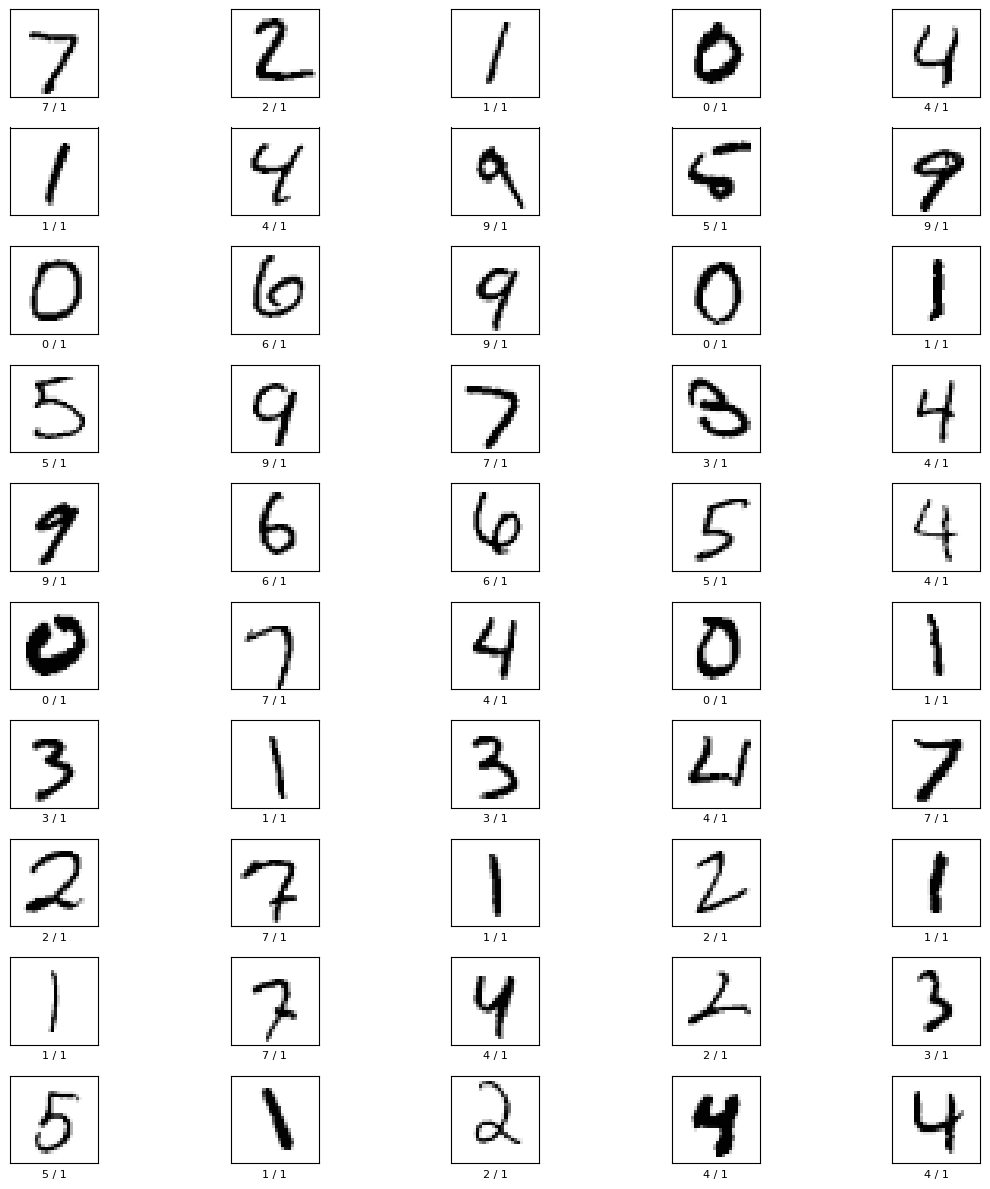

In [ ]:
# validar no slice de teste
my_model = nnn['relu_uniform_2_0.2_256']['nn']
my_model_h = None #nnn['relu_uniform_2_0.2_256']['h']

#for k in nnn.keys():
#    my_model = nnn[k]['nn']
prediction = my_model.predict(X_test_flat)
y_predict = np.argmax(prediction,axis=1)

print(prediction[0:10],'\n')
show_predict_ex2(X_test, y_test, y_predict)


In [ ]:
from sklearn.metrics import accuracy_score


#for m in nnn.keys():

# validar no slice de teste
my_model   = nnn[m]['nn']
my_model_h = nnn[m]['h']

prediction = model.predict(X_test_flat)
y_predict = np.argmax(prediction,axis=1)

print(accuracy_score(y_test, y_predict, normalize=True))
print( prediction, y_test ==  y_predict,'\n'  )


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.9277
[[0.         0.         0.         ... 0.99999994 0.         0.        ]
 [0.         0.         0.99999994 ... 0.         0.         0.        ]
 [0.         0.99999994 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] [ True  True  True ...  True  True  True] 



In [ ]:
!pip install -U albumentations -q
import albumentations as A


import albumentations as A
from PIL import Image
import random

def data_augmentation(data):
  image = np.array(data)
  random.seed(7)
  images = [data,
            A.VerticalFlip(p=1)(image=image)['image'],
            A.Rotate(-30)(image=image)['image'],
            A.Rotate(-95)(image=image)['image'],
            A.Rotate(70)(image=image)['image']

           ]
  return images




[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


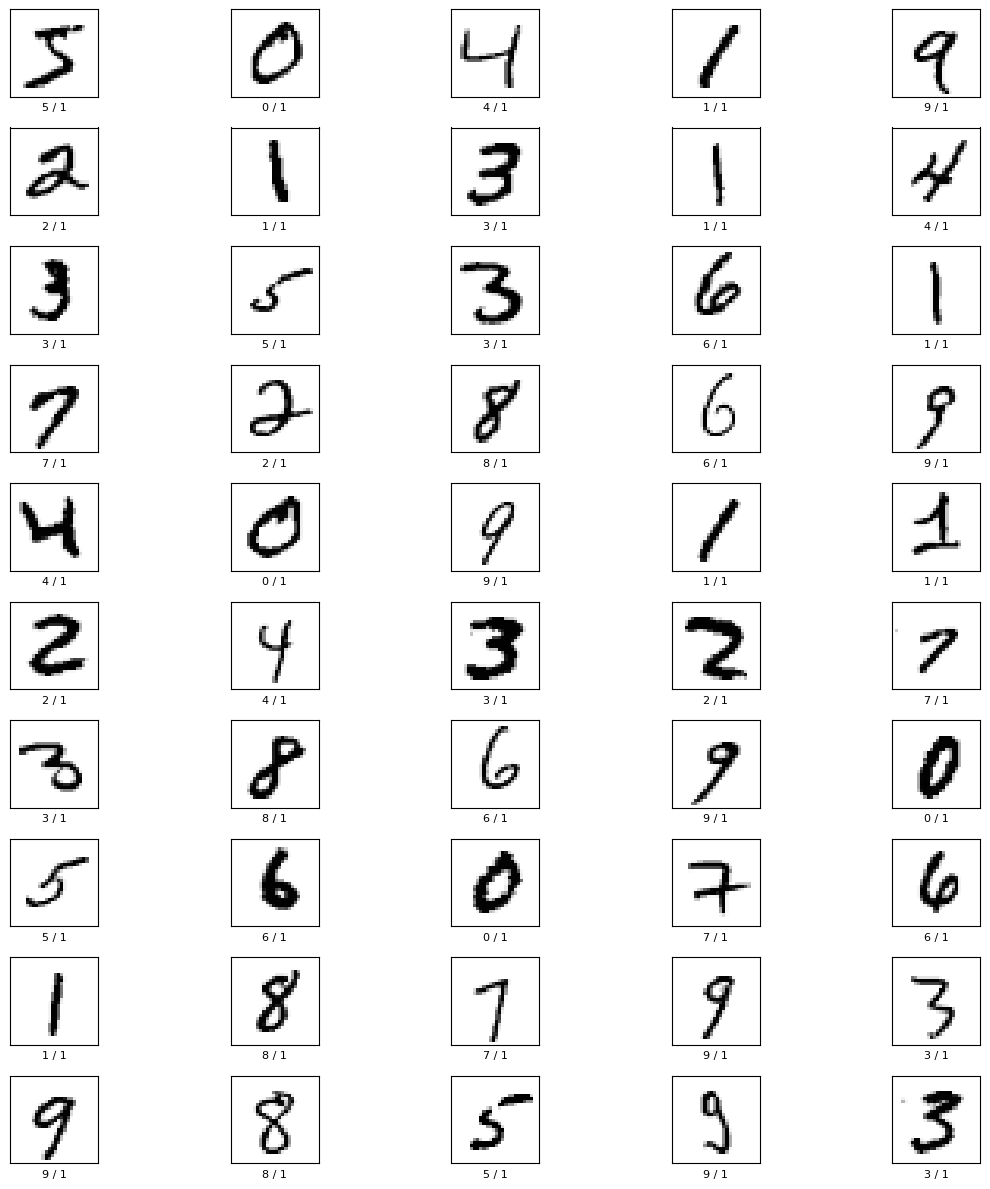

In [ ]:
'''

2) Monte um banco de dados com 50 amostras de dígitos feitos no papel branco com caneta marcadora preto, escritos por 5 pessoas distintas.
Fotografe as amostras e retrabalhe a imagem, retirando somente a área do dígito e deixando-a no formato quadrado 500x500 pixels.
Teste as predições do seu banco de testes com a rede em sua melhor configuração e sintonia. Tire suas conclusões.

'''
#!unzip 'imgs/mnist_handwritten_digits.zip'

from PIL import Image
from numpy import asarray

img = 'Colab Notebooks/images/{d}.png'
i = 0

X_test_new = np.zeros((50, 28, 28))
X_test_flat_new = X_test_new.reshape(-1, 28*28)
X_test_sc_new = X_test_flat_new / 255
y_test_new = np.zeros((50))

for d in range(10):
  image_file = img.replace("{d}", str(d))

  img1=Image.open(image_file)
  img1.thumbnail((28,28))
  img2=img1.convert(mode='L')
  img3=asarray(img2)
  img3 = 255 - img3
  img_to_import = data_augmentation(img3)
  for im in img_to_import:
    X_test_new[i] = im
    X_test_flat_new[i] = X_test_new[i].reshape(-1, 28*28)
    X_test_sc_new[i] = X_test_flat_new[i] / 255
    y_test_new[i] = d
    i += 1

my_model = nnn['relu_uniform_2_0.2_256']['nn']
my_model_h = nnn['relu_uniform_2_0.2_256']['h']

prediction_new = my_model.predict(X_train_sc)
y_predict_new = np.argmax(prediction_new,axis=1)
show_predict_ex2(X_train, y_train, y_predict_new)

